In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [152]:
%%bash
cat BYxRM_simplified.vcf | grep -v "^#" | wc

   16624 17704560 109080109


### PCA

In [3]:
pca_output = pd.read_csv('plink.eigenvec', sep = ' ', header=None)
pca_output

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,A01,1,0.035345,0.012119,0.020363,0.036976,-0.003718,0.038301,0.028045,-0.007186,...,-0.009988,-0.009840,-0.000947,0.016358,0.018966,0.044993,0.018772,0.025147,-0.038774,0.014238
1,A01,2,-0.020373,-0.011530,-0.008718,-0.070399,-0.050629,0.045062,-0.069903,-0.014343,...,0.014122,0.003327,-0.003976,-0.020887,-0.032663,-0.017242,0.015991,-0.007908,0.008725,0.013989
2,A01,3,-0.017266,-0.008064,-0.052266,-0.038847,-0.038261,0.028245,0.046283,0.008466,...,0.015052,-0.002439,-0.048750,0.047930,-0.032183,0.004607,-0.016738,0.003439,-0.063794,-0.034954
3,A01,4,0.020792,-0.074473,-0.007450,0.007979,0.013607,0.022670,-0.024619,0.035339,...,0.000669,-0.005593,0.006858,0.025626,0.012285,0.057778,0.021666,-0.041886,0.001938,-0.043775
4,A01,5,-0.031918,0.068591,0.025089,-0.008338,0.016420,0.010175,0.009659,-0.051205,...,-0.006765,-0.012257,0.014609,-0.034157,-0.011838,0.025975,0.009821,0.030508,-0.011105,0.034869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,A11,92,0.028258,0.029521,0.073246,0.007986,-0.023496,0.002155,-0.015471,-0.016469,...,-0.034350,-0.016404,-0.033016,0.025895,0.022025,0.021827,-0.000942,-0.013724,0.036798,0.037410
947,A11,93,-0.013469,-0.003927,-0.047575,-0.030728,-0.045670,0.016102,-0.035031,-0.048079,...,-0.007580,-0.020664,-0.011800,0.022192,0.014543,0.014683,-0.002665,-0.009335,0.020004,0.001750
948,A11,94,-0.000906,0.063399,0.005936,-0.000015,0.007514,-0.045466,0.020304,-0.008391,...,0.082074,0.032907,-0.035074,0.058970,0.040479,-0.038558,0.029731,-0.057467,-0.015875,-0.017111
949,A11,95,-0.002879,0.053984,0.013385,-0.003550,0.038551,-0.045108,0.005051,0.003467,...,0.010656,-0.029883,-0.024035,0.025607,-0.015668,0.012360,0.011888,0.017862,0.030352,0.055357


In [4]:
pca_output_df = pd.DataFrame(data = pca_output, columns = [2,3,4,5,6,7,8,9,10,11])
pca_output_df

,2,3,4,5,6,7,8,9,10,11
0,0.035345,0.012119,0.020363,0.036976,-0.003718,0.038301,0.028045,-0.007186,0.055228,0.000043
1,-0.020373,-0.011530,-0.008718,-0.070399,-0.050629,0.045062,-0.069903,-0.014343,0.023849,0.027004
2,-0.017266,-0.008064,-0.052266,-0.038847,-0.038261,0.028245,0.046283,0.008466,0.003142,-0.030971
3,0.020792,-0.074473,-0.007450,0.007979,0.013607,0.022670,-0.024619,0.035339,-0.032396,-0.018840
4,-0.031918,0.068591,0.025089,-0.008338,0.016420,0.010175,0.009659,-0.051205,-0.032381,0.030435
...,...,...,...,...,...,...,...,...,...,...
946,0.028258,0.029521,0.073246,0.007986,-0.023496,0.002155,-0.015471,-0.016469,-0.076934,-0.000476
947,-0.013469,-0.003927,-0.047575,-0.030728,-0.045670,0.016102,-0.035031,-0.048079,0.004384,0.005708
948,-0.000906,0.063399,0.005936,-0.000015,0.007514,-0.045466,0.020304,-0.008391,-0.007063,-0.043508
949,-0.002879,0.053984,0.013385,-0.003550,0.038551,-0.045108,0.005051,0.003467,-0.009923,-0.013165


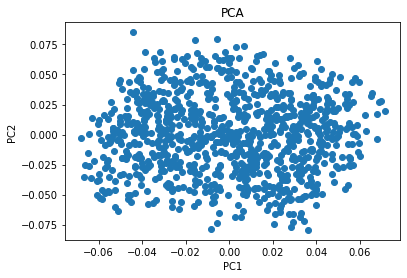

In [5]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df[2], y = pca_output_df[3])
ax.set_title('PCA')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

### Allele Frequency

In [6]:
allele_freq = pd.read_csv('plink.frq',delim_whitespace=True)
allele_freq

,CHR,SNP,A1,A2,MAF,NCHROBS
0,23,s10-24532,G,A,0.4855,1798
1,23,s10-24640,T,C,0.4758,1738
2,23,s10-24647,T,A,0.4721,1722
3,23,s10-25720,C,T,0.4840,1880
4,23,s10-25877,G,T,0.4841,1888
...,...,...,...,...,...,...
16619,XVI,s16-942569,C,G,0.4599,1894
16620,XVI,s16-942576,G,T,0.4974,1898
16621,XVI,s16-942585,G,A,0.4821,1898
16622,XVI,.,T,C,0.3877,1870


In [7]:
allele_freq_df = pd.DataFrame(data = allele_freq)
allele_freq_df

,CHR,SNP,A1,A2,MAF,NCHROBS
0,23,s10-24532,G,A,0.4855,1798
1,23,s10-24640,T,C,0.4758,1738
2,23,s10-24647,T,A,0.4721,1722
3,23,s10-25720,C,T,0.4840,1880
4,23,s10-25877,G,T,0.4841,1888
...,...,...,...,...,...,...
16619,XVI,s16-942569,C,G,0.4599,1894
16620,XVI,s16-942576,G,T,0.4974,1898
16621,XVI,s16-942585,G,A,0.4821,1898
16622,XVI,.,T,C,0.3877,1870


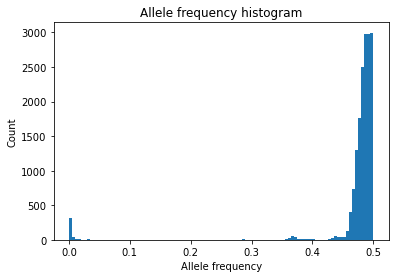

In [8]:
fig, ax = plt.subplots()
ax.hist(allele_freq_df['MAF'],bins=100)
ax.set_title('Allele frequency histogram')
ax.set_xlabel('Allele frequency')
ax.set_ylabel('Count')
plt.show()

In [9]:
# Read in phenotype txt file
phenotype = pd.read_csv('BYxRM_PhenoData.txt',sep='\t')

In [10]:
# Convert to dataframe
phenotype_df = pd.DataFrame(phenotype)

In [11]:
# Rename first column to 'ID'
phenotype_df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

In [12]:
# Split ID column on _ and add new columns FID and IID
phenotype_df[['FID','IID']] = phenotype_df.ID.str.split("_",expand=True)

In [13]:
# Move new columns to beginning of DF
cols_to_move = ['FID', 'IID']
phenotype_df = phenotype_df[cols_to_move + [col for col in phenotype_df.columns if col not in cols_to_move]]

In [14]:
# Remove ID column
del phenotype_df['ID']

In [15]:
# Convert phenotype_df to txt file
phenotype_df.to_csv(r'phenotypes.txt',sep='\t',index=None, na_rep='NA')

## Manhattan Plots

In [16]:
#split columns on any number of spaces 
gwas_cad_chlor = pd.read_csv("plink.Cadmium_Chloride.assoc.linear", sep="\s+")
gwas_cad_chlor['logP'] = -1 * np.log10(gwas_cad_chlor['P'])
gwas_cad_chlor['snp_index'] = range(len(gwas_cad_chlor))
gwas_cad_chlor

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index
0,I,.,1074,C,ADD,676,-0.5976,-1.62200,0.10540,0.977159,0
1,I,.,1074,C,COV1,676,10.2300,1.40100,0.16160,0.791559,1
2,I,.,1074,C,COV2,676,6.8520,0.95190,0.34150,0.466609,2
3,I,.,1074,C,COV3,676,-8.6080,-1.15900,0.24680,0.607655,3
4,I,.,1074,C,COV4,676,-9.3770,-1.26300,0.20710,0.683820,4
...,...,...,...,...,...,...,...,...,...,...,...
182859,XVI,s16-942822,942826,G,COV6,675,18.5200,2.49300,0.01291,1.889074,182859
182860,XVI,s16-942822,942826,G,COV7,675,-8.4760,-1.11900,0.26350,0.579219,182860
182861,XVI,s16-942822,942826,G,COV8,675,-10.7900,-1.44300,0.14960,0.825068,182861
182862,XVI,s16-942822,942826,G,COV9,675,4.7350,0.63920,0.52290,0.281581,182862


In [31]:
df_gwas_cad_chlor = pd.DataFrame(data=gwas_cad_chlor)

In [39]:
df_gwas_cad_chlor.to_csv('cad_chlor.csv')

In [110]:
categories_list = list(df_gwas_cad_chlor['CHR'].value_counts().index)

In [112]:
sig_cad_chlor = df_gwas_cad_chlor.query('P < 10e-5')
sig_cad_chlor

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index
17677,II,s02-721083,721088,T,ADD,713,1.168,4.690,3.291000e-06,5.482672,17677
17688,II,s02-722164,722169,A,ADD,706,1.200,4.807,1.878000e-06,5.726304,17688
17699,II,s02-722584,722589,T,ADD,702,1.341,5.376,1.043000e-07,6.981716,17699
17710,II,s02-723170,723175,C,ADD,721,1.326,5.377,1.030000e-07,6.987163,17710
17721,II,s02-723276,723281,A,ADD,717,1.281,5.184,2.839000e-07,6.546835,17721
...,...,...,...,...,...,...,...,...,...,...,...
76676,VII,s07-935003,935000,A,COV6,722,36.560,3.917,9.844000e-05,4.006828,76676
79332,VII,.,1081450,GG,ADD,711,-1.838,-6.666,5.323000e-11,10.273844,79332
143495,XIV,.,6912,GTC,ADD,722,-1.826,-4.140,3.885000e-05,4.410609,143495
143506,XIV,s14-6924,6924,G,ADD,722,-2.991,-7.699,4.603000e-14,13.336959,143506


In [114]:
cad_chlor_sorted = df_gwas_cad_chlor.sort_values(by = "P")
cad_chlor_sorted['uniform_points'] = range(0, len(cad_chlor_sorted))
cad_chlor_sorted['uniform_pval'] = (cad_chlor_sorted['uniform_points'] + 1) / len(cad_chlor_sorted)
cad_chlor_sorted['uniform_logP'] = -1 * np.log10(cad_chlor_sorted['uniform_pval'])
cad_chlor_sorted

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index,uniform_points,uniform_pval,uniform_logP
18447,II,s02-795750,795756,C,ADD,706,-5.762,-58.53,1.300000e-270,269.886057,18447,0,0.000005,5.262128
18458,II,s02-798776,798782,A,ADD,713,-5.621,-52.27,4.736000e-244,243.324588,18458,1,0.000011,4.961098
18469,II,s02-799311,799317,A,ADD,707,-5.574,-50.16,3.872000e-233,232.412065,18469,2,0.000016,4.785007
18480,II,s02-799985,799991,G,ADD,712,-5.567,-49.79,3.325000e-232,231.478208,18480,3,0.000022,4.660068
18513,II,s02-800740,800746,C,ADD,720,5.521,49.16,1.957000e-230,229.708409,18513,4,0.000027,4.563158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182089,XVI,s16-890342,890346,T,COV6,673,NaN,NaN,NaN,NaN,182089,182859,0.999978,0.000009
182090,XVI,s16-890342,890346,T,COV7,673,NaN,NaN,NaN,NaN,182090,182860,0.999984,0.000007
182091,XVI,s16-890342,890346,T,COV8,673,NaN,NaN,NaN,NaN,182091,182861,0.999989,0.000005
182092,XVI,s16-890342,890346,T,COV9,673,NaN,NaN,NaN,NaN,182092,182862,0.999995,0.000002


#### We can see that the top SNP is s02-795750 from the sorted data

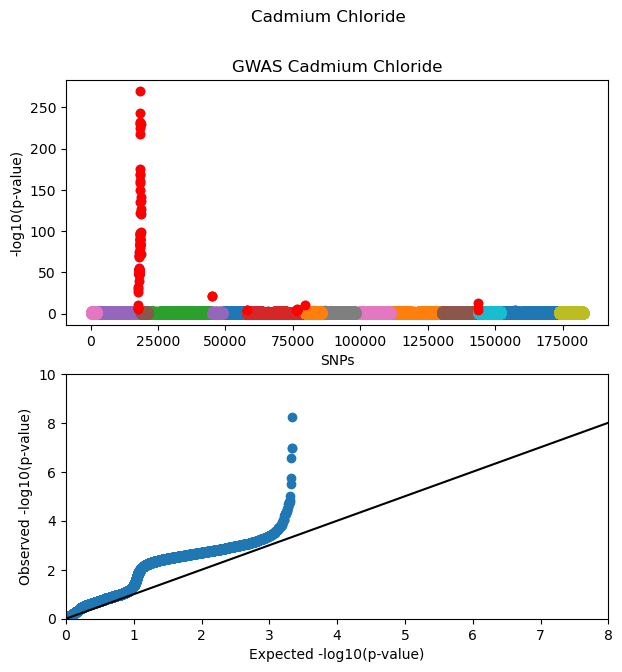

In [122]:
import matplotlib.pyplot as plt

df_gwas_cad_chlor['snp_index'] = range(len(df_gwas_cad_chlor))

fig,ax = plt.subplots(nrows=2, figsize=(7,7))
plt.suptitle("Cadmium Chloride")
plt.style.use('default')

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_cad_chlor["snp_index"][df_gwas_cad_chlor["CHR"]==i], df_gwas_cad_chlor["logP"][df_gwas_cad_chlor["CHR"]==i],)

    for i in categories_list:
        ax[plot].scatter(sig_cad_chlor["snp_index"][sig_cad_chlor["CHR"]==i], sig_cad_chlor["logP"][sig_cad_chlor["CHR"]==i], 
                         color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Cadmium Chloride")

for plot in range(1,2):
    ax[plot].scatter(cad_chlor_sorted["uniform_logP"], cad_chlor_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")

plt.show()

### Top SNP from Cadmium Chloride

We saw from the sorted dataframe that the top (most significant) SNP is s02-795750 on CHR II. Either use PLINK to pull this data, or parse through vcf to get it.

In [148]:
import pandas as pd
import numpy as np

In [42]:
# read in phenotype file

phenotype = pd.read_csv('phenotypes.txt', sep = '\t')
phenotype['subject_id'] = phenotype['FID'].astype(str)+ "_" + phenotype['IID'].astype(str)
phenotype

,FID,IID,Cadmium_Chloride,Caffeine,Calcium_Chloride,Cisplatin,Cobalt_Chloride,Congo_red,Copper,Cycloheximide,...,Xylose,YNB,YNB:ph3,YNB:ph8,YPD,YPD:15C,YPD:37C,YPD:4C,Zeocin,subject_id
0,A01,1,-7.323520,0.279993,0.313118,1.658179,-1.604442,5.841617,-4.130950,0.821226,...,-0.309149,17.470822,0.055225,-0.184268,24.548971,0.712171,0.890842,4.118372,8.592818,A01_1
1,A01,2,-8.098236,-0.206326,-0.534844,-0.918012,0.892198,-1.618172,1.131947,-0.764736,...,0.697908,18.052925,0.283462,1.662201,26.808476,-1.522498,0.006062,0.066515,-4.220476,A01_2
2,A01,3,7.605720,-0.127960,-0.311102,-2.712088,3.301709,-6.680571,-1.138056,-3.382532,...,1.474329,18.163782,-0.951379,0.369565,26.183975,1.082289,1.723157,5.714088,-6.506519,A01_3
3,A01,4,-6.147649,0.878392,-0.563331,-0.827358,-1.291270,2.753851,-2.268121,0.867456,...,-0.739040,15.575856,-1.690867,-0.840344,20.893646,-0.636280,0.053258,-3.196936,0.294462,A01_4
4,A01,5,9.379060,-1.353169,0.405204,-1.137234,4.260286,-7.391216,-3.222742,1.586376,...,0.959138,17.808444,0.127621,1.967267,28.621507,-3.720999,-0.768724,-4.002786,7.045575,A01_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,A11,92,-4.262720,-0.893290,-0.329504,0.257061,-3.120957,2.556543,2.567092,2.054232,...,1.130568,16.629005,0.531583,NaN,23.520842,0.159946,-5.158120,-0.090273,-7.030154,A11_92
1004,A11,93,-10.147285,1.145573,0.048948,-1.089350,0.539833,2.720952,-3.445357,0.891066,...,1.977915,15.687951,-0.098451,NaN,21.553930,2.977722,-1.913176,4.279626,-4.650492,A11_93
1005,A11,94,NaN,0.321844,NaN,1.016712,1.801923,-4.157083,-0.097598,-1.954080,...,1.363267,17.357844,0.390511,NaN,23.977236,0.078992,1.801422,NaN,-0.499069,A11_94
1006,A11,95,NaN,-1.001507,NaN,0.004191,4.675717,-10.240998,1.244410,-0.810857,...,0.942454,17.098753,-0.432459,NaN,22.927686,-0.254905,-1.747526,NaN,-7.435961,A11_95


In [104]:
# open vcf
vcf = open('/Users/cmdb/qbb2020-answers/lab3/plink_analysis/BYxRM_simplified.vcf')
# iterate through lines
for line in vcf:
    
    # get sample IDs
    if line.startswith("#CHROM"):
        data2 = line.split('\t')
        sample_names = data2[9:]
    
    # Skip header
    if (line[0] == '#'):
        continue 
        
    # split on tab
    data = line.split('\t')
    
    # get genotype data
    if data[2] == "s02-795750":
        allele_data = data[9:]

In [76]:
allele_data_split = []

# remove everything after the :
for item in allele_data:
    tempitem = item.strip(":")[0:3]
    allele_data_split.append(tempitem)

In [105]:
# remove the \n on the last item
allele_data_split[-1] = allele_data_split[-1].strip()
sample_names[-1] = sample_names[-1].strip()

In [98]:
# create dataframes
df_alleles = pd.DataFrame(allele_data_split,columns=['Alleles'])
df_samples = pd.DataFrame(sample_names, columns=['subject_id'])
# assign ./. to be a NaN
df_alleles = df_alleles.replace('./.', np.nan)

In [107]:
# merge genotypes and sample ID data
genotype_data = pd.merge(df_alleles, df_samples, left_index=True, right_index=True)
genotype_data

,Alleles,subject_id
0,0/0,A01_01
1,0/0,A01_02
2,1/1,A01_03
3,0/0,A01_04
4,1/1,A01_05
...,...,...
1051,0/0,A11_92
1052,0/0,A11_93
1053,1/1,A11_94
1054,1/1,A11_95


In [108]:
# merge genotype and phenotype data on their subject id
snp_data = pd.merge(genotype_data, phenotype, on = 'subject_id')
snp_data

,Alleles,subject_id,FID,IID,Cadmium_Chloride,Caffeine,Calcium_Chloride,Cisplatin,Cobalt_Chloride,Congo_red,...,x6-Azauracil,Xylose,YNB,YNB:ph3,YNB:ph8,YPD,YPD:15C,YPD:37C,YPD:4C,Zeocin
0,0/0,A01_10,A01,10,-8.144131,-2.787328,-1.111711,-0.239611,-2.933533,1.231604,...,0.685319,-0.594544,16.388451,-0.742849,-0.427930,23.697733,-2.967864,-1.553708,-5.314155,-1.229565
1,1/1,A01_11,A01,11,8.899816,-0.810954,2.245973,-0.011319,4.848952,-5.856839,...,-0.348671,1.130538,17.549599,1.665971,-1.199415,25.955525,1.547801,-5.177222,-5.319109,-3.380222
2,0/0,A01_12,A01,12,-1.369245,-0.586890,2.689781,NaN,-0.974813,10.651144,...,0.758715,1.728974,18.901943,NaN,-1.525070,26.170897,1.283839,-1.863259,6.651397,5.552718
3,1/1,A01_13,A01,13,6.099126,1.193630,-0.460481,-2.254822,-1.737934,-6.773013,...,0.428124,-0.447422,15.707533,1.328875,-0.676125,22.880547,-4.488093,3.399301,-5.313911,-4.854207
4,0/0,A01_14,A01,14,-6.128808,2.287569,0.030860,1.457627,2.658909,8.873294,...,0.871464,0.239443,16.293701,0.306043,0.903620,23.053594,4.081697,3.783942,0.069884,2.976971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0/0,A11_92,A11,92,-4.262720,-0.893290,-0.329504,0.257061,-3.120957,2.556543,...,0.232614,1.130568,16.629005,0.531583,NaN,23.520842,0.159946,-5.158120,-0.090273,-7.030154
908,0/0,A11_93,A11,93,-10.147285,1.145573,0.048948,-1.089350,0.539833,2.720952,...,-0.317916,1.977915,15.687951,-0.098451,NaN,21.553930,2.977722,-1.913176,4.279626,-4.650492
909,1/1,A11_94,A11,94,NaN,0.321844,NaN,1.016712,1.801923,-4.157083,...,-1.698334,1.363267,17.357844,0.390511,NaN,23.977236,0.078992,1.801422,NaN,-0.499069
910,1/1,A11_95,A11,95,NaN,-1.001507,NaN,0.004191,4.675717,-10.240998,...,0.259829,0.942454,17.098753,-0.432459,NaN,22.927686,-0.254905,-1.747526,NaN,-7.435961


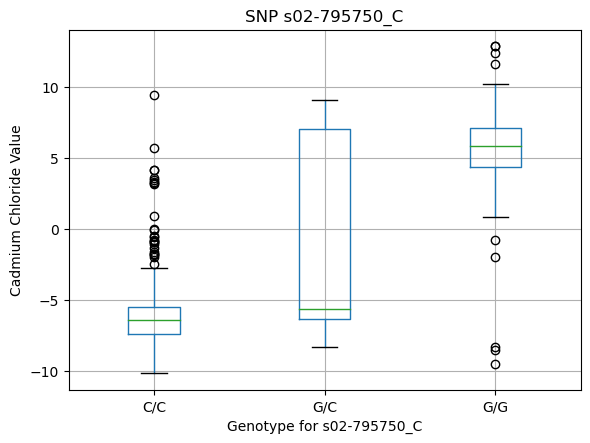

In [109]:
# box plot for top SNP to show phenotype stratified by genotype
plt.style.use('default')
snp_data.boxplot(column=['Cadmium_Chloride'], by=['Alleles'])
title_boxplot = 'SNP s02-795750_C'
plt.title(title_boxplot)
plt.suptitle('')
plt.ylabel('Cadmium Chloride Value')
plt.xlabel('Genotype for s02-795750_C')
plt.xticks([1,2,3],['C/C','G/C','G/G'])
plt.show()

## Rest of Manhattan and QQ Plots for other phenotypes below

### Caffeine

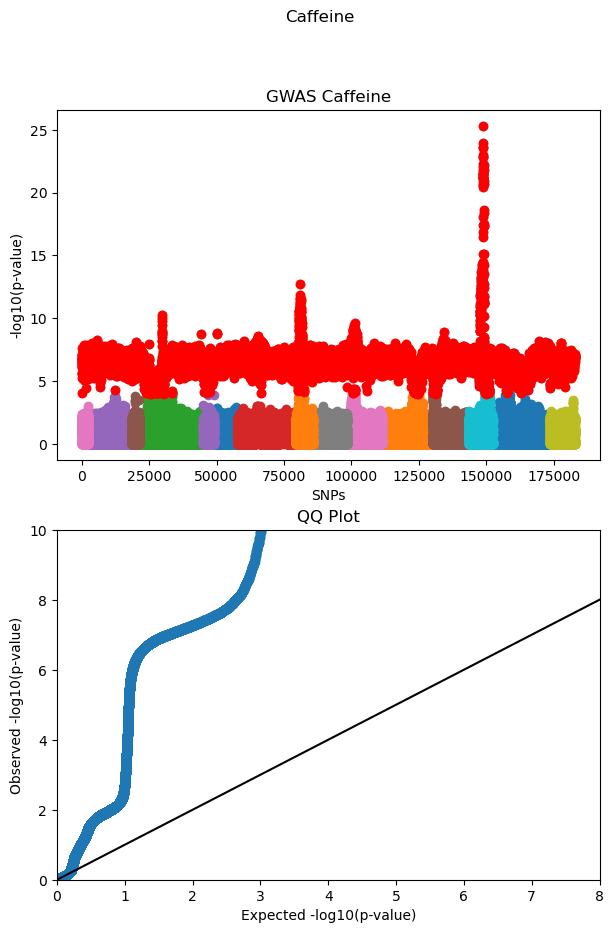

In [69]:
#split columns on any number of spaces 
gwas_caff = pd.read_csv("plink.Caffeine.assoc.linear", sep="\s+")
gwas_caff['logP'] = -1 * np.log10(gwas_caff['P'])
gwas_caff['snp_index'] = range(len(gwas_caff))

# convert to dataframe
df_gwas_caff = pd.DataFrame(data=gwas_caff)

# get significant SNPs
sig_caff = df_gwas_caff.query('P < 10e-5')

# sort
caff_sorted = df_gwas_caff.sort_values(by = "P")
caff_sorted['uniform_points'] = range(0, len(caff_sorted))
caff_sorted['uniform_pval'] = (caff_sorted['uniform_points'] + 1) / len(caff_sorted)
caff_sorted['uniform_logP'] = -1 * np.log10(caff_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_caff['snp_index'] = range(len(df_gwas_caff))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Caffeine")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_caff["snp_index"][df_gwas_caff["CHR"]==i], df_gwas_caff["logP"][df_gwas_caff["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_caff["snp_index"][sig_caff["CHR"]==i], sig_caff["logP"][sig_caff["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Caffeine")

for plot in range(1,2):
    ax[plot].scatter(caff_sorted["uniform_logP"], caff_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

In [70]:
caff_sorted

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index,uniform_points,uniform_pval,uniform_logP
148951,XIV,s14-466105,466103,G,ADD,900,0.3159,10.90,4.672000e-26,25.330497,148951,0,0.000005,5.262128
148984,XIV,s14-467221,467219,A,ADD,910,0.3062,10.56,1.222000e-24,23.912929,148984,1,0.000011,4.961098
148962,XIV,s14-466590,466588,T,ADD,908,0.3013,10.48,2.465000e-24,23.608183,148962,2,0.000016,4.785007
148742,XIV,s14-445768,445766,A,ADD,907,-0.3033,-10.46,2.953000e-24,23.529737,148742,3,0.000022,4.660068
148918,XIV,s14-464119,464117,A,ADD,902,0.3026,10.33,1.046000e-23,22.980468,148918,4,0.000027,4.563158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182089,XVI,s16-890342,890346,T,COV6,847,NaN,NaN,NaN,NaN,182089,182859,0.999978,0.000009
182090,XVI,s16-890342,890346,T,COV7,847,NaN,NaN,NaN,NaN,182090,182860,0.999984,0.000007
182091,XVI,s16-890342,890346,T,COV8,847,NaN,NaN,NaN,NaN,182091,182861,0.999989,0.000005
182092,XVI,s16-890342,890346,T,COV9,847,NaN,NaN,NaN,NaN,182092,182862,0.999995,0.000002


### Calcium Chloride

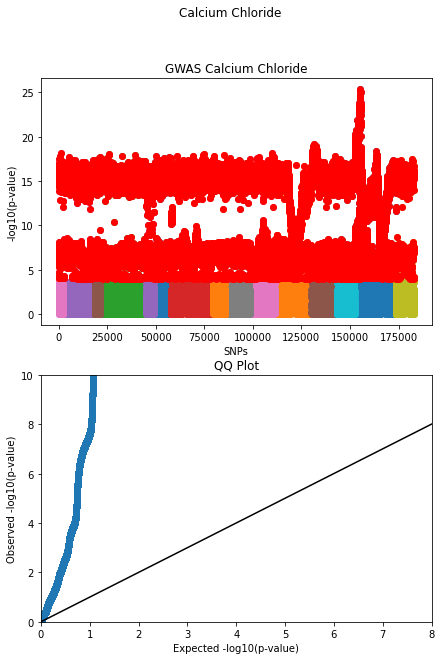

In [82]:
#split columns on any number of spaces 
gwas_cal_chlor = pd.read_csv("plink.Calcium_Chloride.assoc.linear", sep="\s+")
gwas_cal_chlor['logP'] = -1 * np.log10(gwas_cal_chlor['P'])
gwas_cal_chlor['snp_index'] = range(len(gwas_cal_chlor))

# convert to dataframe
df_gwas_cal_chlor = pd.DataFrame(data=gwas_cal_chlor)

# get significant SNPs
sig_cal_chlor = df_gwas_cal_chlor.query('P < 10e-5')

# sort
cal_chlor_sorted = df_gwas_cal_chlor.sort_values(by = "P")
cal_chlor_sorted['uniform_points'] = range(0, len(cal_chlor_sorted))
cal_chlor_sorted['uniform_pval'] = (cal_chlor_sorted['uniform_points'] + 1) / len(cal_chlor_sorted)
cal_chlor_sorted['uniform_logP'] = -1 * np.log10(cal_chlor_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_cal_chlor['snp_index'] = range(len(df_gwas_cal_chlor))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Calcium Chloride")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_cal_chlor["snp_index"][df_gwas_cal_chlor["CHR"]==i], df_gwas_cal_chlor["logP"][df_gwas_cal_chlor["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_cal_chlor["snp_index"][sig_cal_chlor["CHR"]==i], sig_cal_chlor["logP"][sig_cal_chlor["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Calcium Chloride")

for plot in range(1,2):
    ax[plot].scatter(cal_chlor_sorted["uniform_logP"], cal_chlor_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Cisplatin

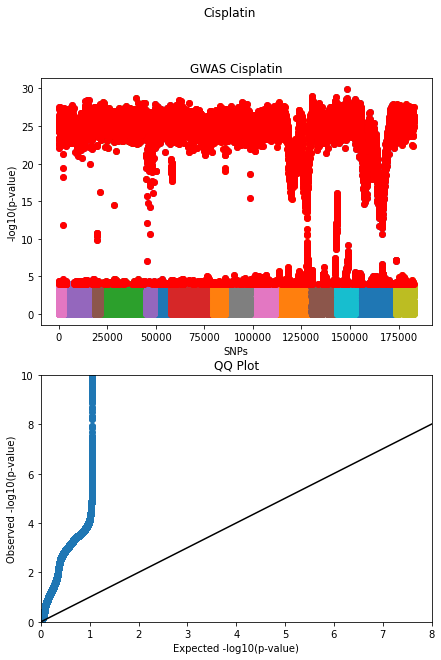

In [71]:
#split columns on any number of spaces 
gwas_cis = pd.read_csv("plink.Cisplatin.assoc.linear", sep="\s+")
gwas_cis['logP'] = -1 * np.log10(gwas_cis['P'])
gwas_cis['snp_index'] = range(len(gwas_cis))

# convert to dataframe
df_gwas_cis = pd.DataFrame(data=gwas_cis)

# get significant SNPs
sig_cis = df_gwas_cis.query('P < 10e-5')

# sort
cis_sorted = df_gwas_cis.sort_values(by = "P")
cis_sorted['uniform_points'] = range(0, len(cis_sorted))
cis_sorted['uniform_pval'] = (cis_sorted['uniform_points'] + 1) / len(cis_sorted)
cis_sorted['uniform_logP'] = -1 * np.log10(cis_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_cis['snp_index'] = range(len(df_gwas_cis))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Cisplatin")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_cis["snp_index"][df_gwas_cis["CHR"]==i], df_gwas_cis["logP"][df_gwas_cis["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_cis["snp_index"][sig_cis["CHR"]==i], sig_cis["logP"][sig_cis["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Cisplatin")

for plot in range(1,2):
    ax[plot].scatter(cis_sorted["uniform_logP"], cis_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Cobalt Chloride

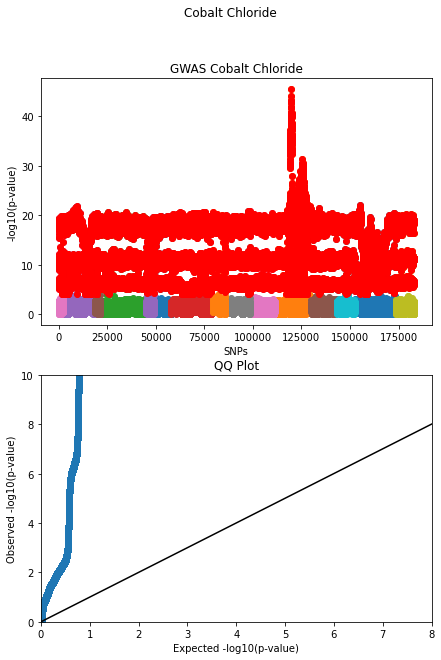

In [45]:
#split columns on any number of spaces 
gwas_cob_chlor = pd.read_csv("plink.Cobalt_Chloride.assoc.linear", sep="\s+")
gwas_cob_chlor['logP'] = -1 * np.log10(gwas_cob_chlor['P'])
gwas_cob_chlor['snp_index'] = range(len(gwas_cob_chlor))

# convert to dataframe
df_gwas_cob_chlor = pd.DataFrame(data=gwas_cob_chlor)

# get significant SNPs
sig_cob_chlor = df_gwas_cob_chlor.query('P < 10e-5')

# sort
cob_chlor_sorted = df_gwas_cob_chlor.sort_values(by = "P")
cob_chlor_sorted['uniform_points'] = range(0, len(cob_chlor_sorted))
cob_chlor_sorted['uniform_pval'] = (cob_chlor_sorted['uniform_points'] + 1) / len(cob_chlor_sorted)
cob_chlor_sorted['uniform_logP'] = -1 * np.log10(cob_chlor_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_cob_chlor['snp_index'] = range(len(df_gwas_cob_chlor))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Cobalt Chloride")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_cob_chlor["snp_index"][df_gwas_cob_chlor["CHR"]==i], df_gwas_cob_chlor["logP"][df_gwas_cob_chlor["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_cob_chlor["snp_index"][sig_cob_chlor["CHR"]==i], sig_cob_chlor["logP"][sig_cob_chlor["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Cobalt Chloride")

for plot in range(1,2):
    ax[plot].scatter(cob_chlor_sorted["uniform_logP"], cob_chlor_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Congo red

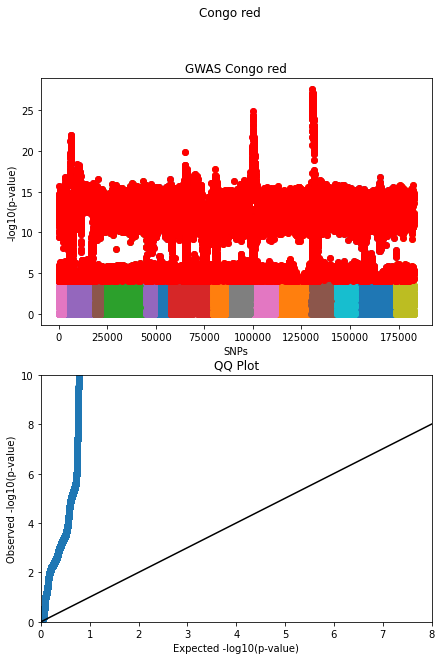

In [46]:
#split columns on any number of spaces 
gwas_congo = pd.read_csv("plink.Congo_red.assoc.linear", sep="\s+")
gwas_congo['logP'] = -1 * np.log10(gwas_congo['P'])
gwas_congo['snp_index'] = range(len(gwas_congo))

# convert to dataframe
df_gwas_congo = pd.DataFrame(data=gwas_congo)

# get significant SNPs
sig_congo = df_gwas_congo.query('P < 10e-5')

# sort
congo_sorted = df_gwas_congo.sort_values(by = "P")
congo_sorted['uniform_points'] = range(0, len(congo_sorted))
congo_sorted['uniform_pval'] = (congo_sorted['uniform_points'] + 1) / len(congo_sorted)
congo_sorted['uniform_logP'] = -1 * np.log10(congo_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_congo['snp_index'] = range(len(df_gwas_congo))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Congo red")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_congo["snp_index"][df_gwas_congo["CHR"]==i], df_gwas_congo["logP"][df_gwas_congo["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_congo["snp_index"][sig_congo["CHR"]==i], sig_congo["logP"][sig_congo["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Congo red")

for plot in range(1,2):
    ax[plot].scatter(congo_sorted["uniform_logP"], congo_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Copper

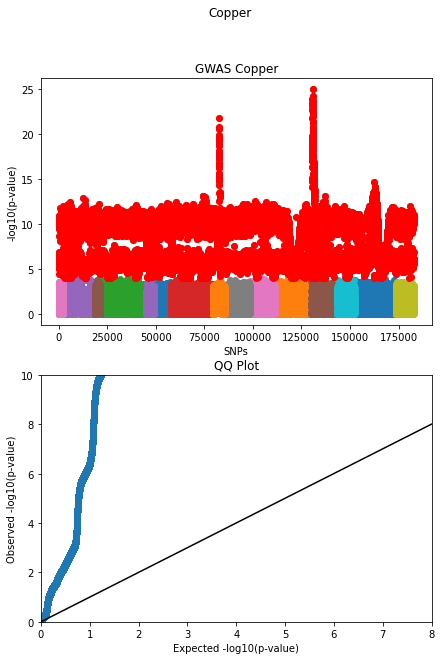

In [47]:
#split columns on any number of spaces 
gwas_copper = pd.read_csv("plink.Copper.assoc.linear", sep="\s+")
gwas_copper['logP'] = -1 * np.log10(gwas_copper['P'])
gwas_copper['snp_index'] = range(len(gwas_copper))

# convert to dataframe
df_gwas_copper = pd.DataFrame(data=gwas_copper)

# get significant SNPs
sig_copper = df_gwas_copper.query('P < 10e-5')

# sort
copper_sorted = df_gwas_copper.sort_values(by = "P")
copper_sorted['uniform_points'] = range(0, len(copper_sorted))
copper_sorted['uniform_pval'] = (copper_sorted['uniform_points'] + 1) / len(copper_sorted)
copper_sorted['uniform_logP'] = -1 * np.log10(copper_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_copper['snp_index'] = range(len(df_gwas_copper))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Copper")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_copper["snp_index"][df_gwas_copper["CHR"]==i], df_gwas_copper["logP"][df_gwas_copper["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_copper["snp_index"][sig_copper["CHR"]==i], sig_copper["logP"][sig_copper["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Copper")

for plot in range(1,2):
    ax[plot].scatter(copper_sorted["uniform_logP"], copper_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Cycloheximide

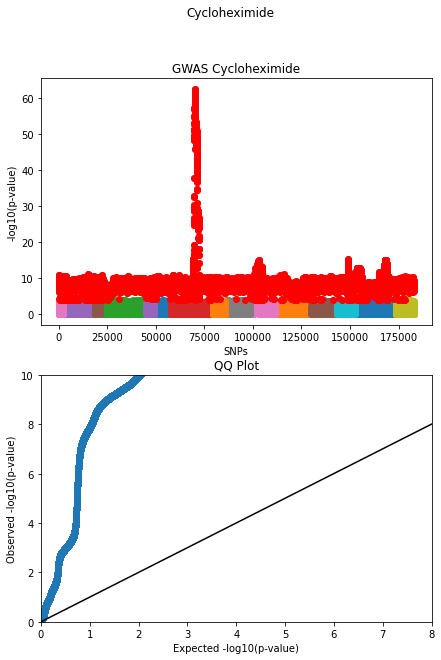

In [48]:
#split columns on any number of spaces 
gwas_cyclo = pd.read_csv("plink.Cycloheximide.assoc.linear", sep="\s+")
gwas_cyclo['logP'] = -1 * np.log10(gwas_cyclo['P'])
gwas_cyclo['snp_index'] = range(len(gwas_cyclo))

# convert to dataframe
df_gwas_cyclo = pd.DataFrame(data=gwas_cyclo)

# get significant SNPs
sig_cyclo = df_gwas_cyclo.query('P < 10e-5')

# sort
cyclo_sorted = df_gwas_cyclo.sort_values(by = "P")
cyclo_sorted['uniform_points'] = range(0, len(cyclo_sorted))
cyclo_sorted['uniform_pval'] = (cyclo_sorted['uniform_points'] + 1) / len(cyclo_sorted)
cyclo_sorted['uniform_logP'] = -1 * np.log10(cyclo_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_cyclo['snp_index'] = range(len(df_gwas_cyclo))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Cycloheximide")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_cyclo["snp_index"][df_gwas_cyclo["CHR"]==i], df_gwas_cyclo["logP"][df_gwas_cyclo["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_cyclo["snp_index"][sig_cyclo["CHR"]==i], sig_cyclo["logP"][sig_cyclo["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Cycloheximide")

for plot in range(1,2):
    ax[plot].scatter(cyclo_sorted["uniform_logP"], cyclo_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Diamide

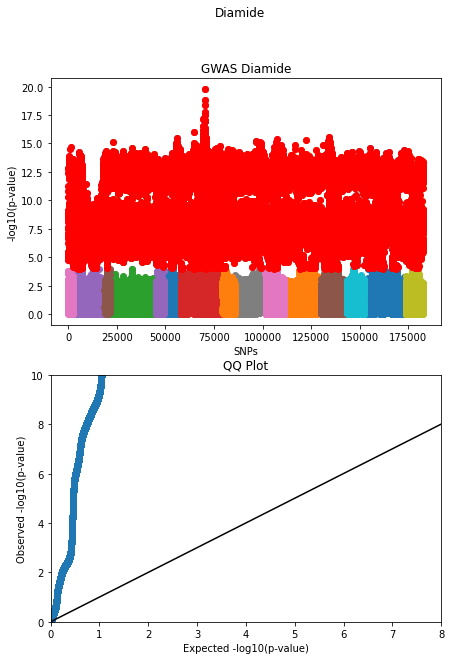

In [49]:
#split columns on any number of spaces 
gwas_diamide = pd.read_csv("plink.Diamide.assoc.linear", sep="\s+")
gwas_diamide['logP'] = -1 * np.log10(gwas_diamide['P'])
gwas_diamide['snp_index'] = range(len(gwas_diamide))

# convert to dataframe
df_gwas_diamide = pd.DataFrame(data=gwas_diamide)

# get significant SNPs
sig_diamide = df_gwas_diamide.query('P < 10e-5')

# sort
diamide_sorted = df_gwas_diamide.sort_values(by = "P")
diamide_sorted['uniform_points'] = range(0, len(diamide_sorted))
diamide_sorted['uniform_pval'] = (diamide_sorted['uniform_points'] + 1) / len(diamide_sorted)
diamide_sorted['uniform_logP'] = -1 * np.log10(diamide_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_diamide['snp_index'] = range(len(df_gwas_diamide))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Diamide")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_diamide["snp_index"][df_gwas_diamide["CHR"]==i], df_gwas_diamide["logP"][df_gwas_diamide["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_diamide["snp_index"][sig_diamide["CHR"]==i], sig_diamide["logP"][sig_diamide["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Diamide")

for plot in range(1,2):
    ax[plot].scatter(diamide_sorted["uniform_logP"], diamide_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### E6 Berbamine

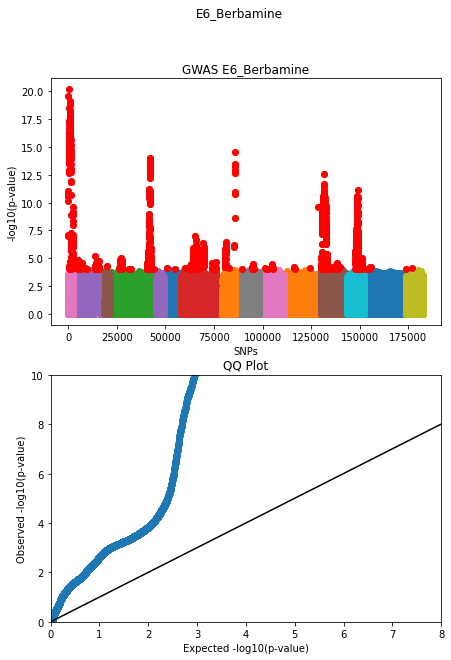

In [50]:
#split columns on any number of spaces 
gwas_berb = pd.read_csv("plink.E6_Berbamine.assoc.linear", sep="\s+")
gwas_berb['logP'] = -1 * np.log10(gwas_berb['P'])
gwas_berb['snp_index'] = range(len(gwas_berb))

# convert to dataframe
df_gwas_berb = pd.DataFrame(data=gwas_berb)

# get significant SNPs
sig_berb = df_gwas_berb.query('P < 10e-5')

# sort
berb_sorted = df_gwas_berb.sort_values(by = "P")
berb_sorted['uniform_points'] = range(0, len(berb_sorted))
berb_sorted['uniform_pval'] = (berb_sorted['uniform_points'] + 1) / len(berb_sorted)
berb_sorted['uniform_logP'] = -1 * np.log10(berb_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_berb['snp_index'] = range(len(df_gwas_berb))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("E6_Berbamine")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_berb["snp_index"][df_gwas_berb["CHR"]==i], df_gwas_berb["logP"][df_gwas_berb["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_berb["snp_index"][sig_berb["CHR"]==i], sig_berb["logP"][sig_berb["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS E6_Berbamine")

for plot in range(1,2):
    ax[plot].scatter(berb_sorted["uniform_logP"], berb_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Ethanol

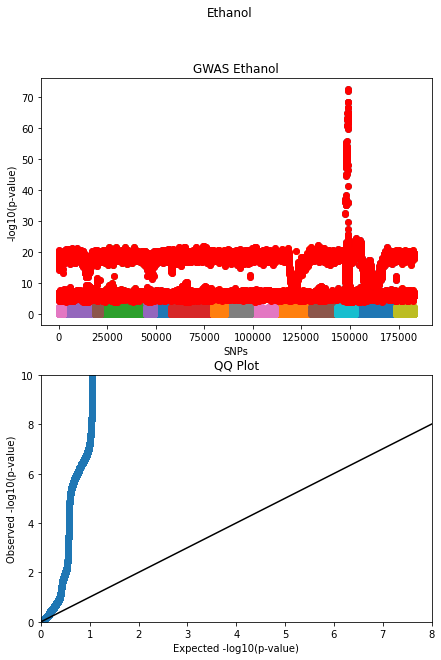

In [51]:
#split columns on any number of spaces 
gwas_ethanol = pd.read_csv("plink.Ethanol.assoc.linear", sep="\s+")
gwas_ethanol['logP'] = -1 * np.log10(gwas_ethanol['P'])
gwas_ethanol['snp_index'] = range(len(gwas_ethanol))

# convert to dataframe
df_gwas_ethanol = pd.DataFrame(data=gwas_ethanol)

# get significant SNPs
sig_ethanol = df_gwas_ethanol.query('P < 10e-5')

# sort
ethanol_sorted = df_gwas_ethanol.sort_values(by = "P")
ethanol_sorted['uniform_points'] = range(0, len(ethanol_sorted))
ethanol_sorted['uniform_pval'] = (ethanol_sorted['uniform_points'] + 1) / len(ethanol_sorted)
ethanol_sorted['uniform_logP'] = -1 * np.log10(ethanol_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_ethanol['snp_index'] = range(len(df_gwas_ethanol))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Ethanol")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_ethanol["snp_index"][df_gwas_ethanol["CHR"]==i], df_gwas_ethanol["logP"][df_gwas_ethanol["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_ethanol["snp_index"][sig_ethanol["CHR"]==i], sig_ethanol["logP"][sig_ethanol["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Ethanol")

for plot in range(1,2):
    ax[plot].scatter(ethanol_sorted["uniform_logP"], ethanol_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Formamide

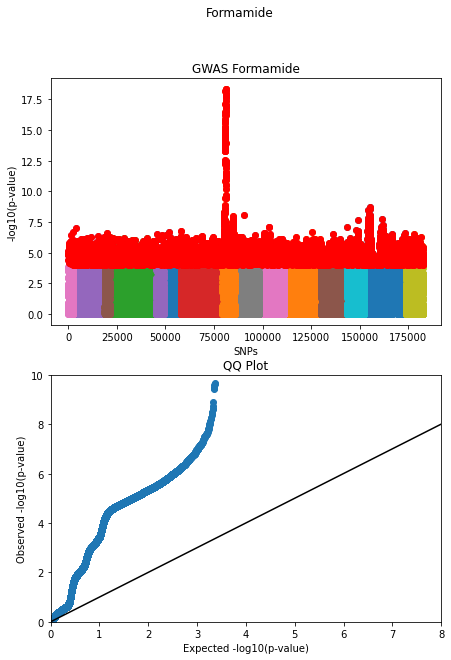

In [52]:
#split columns on any number of spaces 
gwas_form = pd.read_csv("plink.Formamide.assoc.linear", sep="\s+")
gwas_form['logP'] = -1 * np.log10(gwas_form['P'])
gwas_form['snp_index'] = range(len(gwas_form))

# convert to dataframe
df_gwas_form = pd.DataFrame(data=gwas_form)

# get significant SNPs
sig_form = df_gwas_form.query('P < 10e-5')

# sort
form_sorted = df_gwas_form.sort_values(by = "P")
form_sorted['uniform_points'] = range(0, len(form_sorted))
form_sorted['uniform_pval'] = (form_sorted['uniform_points'] + 1) / len(form_sorted)
form_sorted['uniform_logP'] = -1 * np.log10(form_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_form['snp_index'] = range(len(df_gwas_form))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Formamide")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_form["snp_index"][df_gwas_form["CHR"]==i], df_gwas_form["logP"][df_gwas_form["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_form["snp_index"][sig_form["CHR"]==i], sig_form["logP"][sig_form["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Formamide")

for plot in range(1,2):
    ax[plot].scatter(form_sorted["uniform_logP"], form_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Galactose

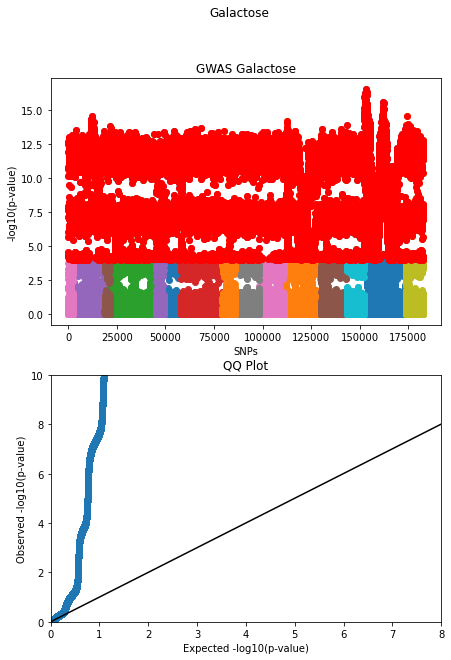

In [54]:
#split columns on any number of spaces 
gwas_galac = pd.read_csv("plink.Galactose.assoc.linear", sep="\s+")
gwas_galac['logP'] = -1 * np.log10(gwas_galac['P'])
gwas_galac['snp_index'] = range(len(gwas_galac))

# convert to dataframe
df_gwas_galac = pd.DataFrame(data=gwas_galac)

# get significant SNPs
sig_galac = df_gwas_galac.query('P < 10e-5')

# sort
galac_sorted = df_gwas_galac.sort_values(by = "P")
galac_sorted['uniform_points'] = range(0, len(galac_sorted))
galac_sorted['uniform_pval'] = (galac_sorted['uniform_points'] + 1) / len(galac_sorted)
galac_sorted['uniform_logP'] = -1 * np.log10(galac_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_galac['snp_index'] = range(len(df_gwas_galac))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Galactose")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_galac["snp_index"][df_gwas_galac["CHR"]==i], df_gwas_galac["logP"][df_gwas_galac["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_galac["snp_index"][sig_galac["CHR"]==i], sig_galac["logP"][sig_galac["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Galactose")

for plot in range(1,2):
    ax[plot].scatter(galac_sorted["uniform_logP"], galac_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Hydrogen Peroxide

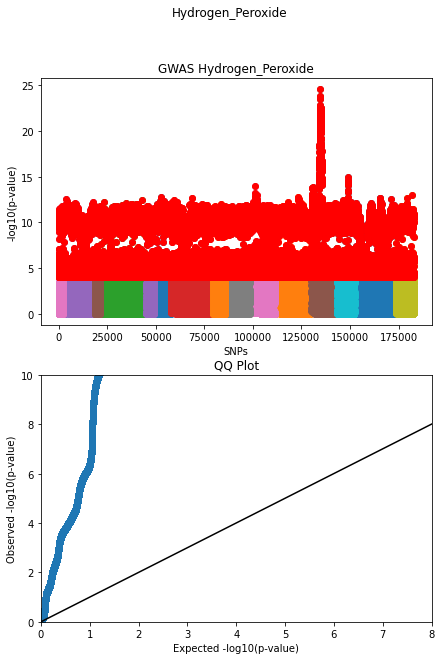

In [55]:
#split columns on any number of spaces 
gwas_perox = pd.read_csv("plink.Hydrogen_Peroxide.assoc.linear", sep="\s+")
gwas_perox['logP'] = -1 * np.log10(gwas_perox['P'])
gwas_perox['snp_index'] = range(len(gwas_perox))

# convert to dataframe
df_gwas_perox = pd.DataFrame(data=gwas_perox)

# get significant SNPs
sig_perox = df_gwas_perox.query('P < 10e-5')

# sort
perox_sorted = df_gwas_perox.sort_values(by = "P")
perox_sorted['uniform_points'] = range(0, len(perox_sorted))
perox_sorted['uniform_pval'] = (perox_sorted['uniform_points'] + 1) / len(perox_sorted)
perox_sorted['uniform_logP'] = -1 * np.log10(perox_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_perox['snp_index'] = range(len(df_gwas_perox))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Hydrogen_Peroxide")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_perox["snp_index"][df_gwas_perox["CHR"]==i], df_gwas_perox["logP"][df_gwas_perox["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_perox["snp_index"][sig_perox["CHR"]==i], sig_perox["logP"][sig_perox["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Hydrogen_Peroxide")

for plot in range(1,2):
    ax[plot].scatter(perox_sorted["uniform_logP"], perox_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Hydroquinone

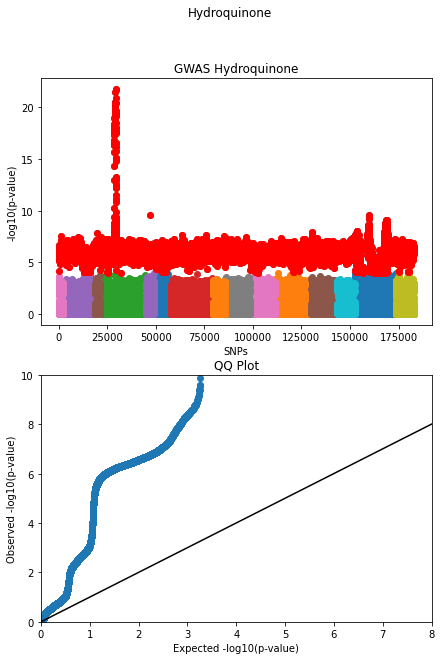

In [56]:
#split columns on any number of spaces 
gwas_hydroq = pd.read_csv("plink.Hydroquinone.assoc.linear", sep="\s+")
gwas_hydroq['logP'] = -1 * np.log10(gwas_hydroq['P'])
gwas_hydroq['snp_index'] = range(len(gwas_hydroq))

# convert to dataframe
df_gwas_hydroq = pd.DataFrame(data=gwas_hydroq)

# get significant SNPs
sig_hydroq = df_gwas_hydroq.query('P < 10e-5')

# sort
hydroq_sorted = df_gwas_hydroq.sort_values(by = "P")
hydroq_sorted['uniform_points'] = range(0, len(hydroq_sorted))
hydroq_sorted['uniform_pval'] = (hydroq_sorted['uniform_points'] + 1) / len(hydroq_sorted)
hydroq_sorted['uniform_logP'] = -1 * np.log10(hydroq_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_hydroq['snp_index'] = range(len(df_gwas_hydroq))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Hydroquinone")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_hydroq["snp_index"][df_gwas_hydroq["CHR"]==i], df_gwas_hydroq["logP"][df_gwas_hydroq["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_hydroq["snp_index"][sig_hydroq["CHR"]==i], sig_hydroq["logP"][sig_hydroq["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Hydroquinone")

for plot in range(1,2):
    ax[plot].scatter(hydroq_sorted["uniform_logP"], hydroq_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Hydroxyurea

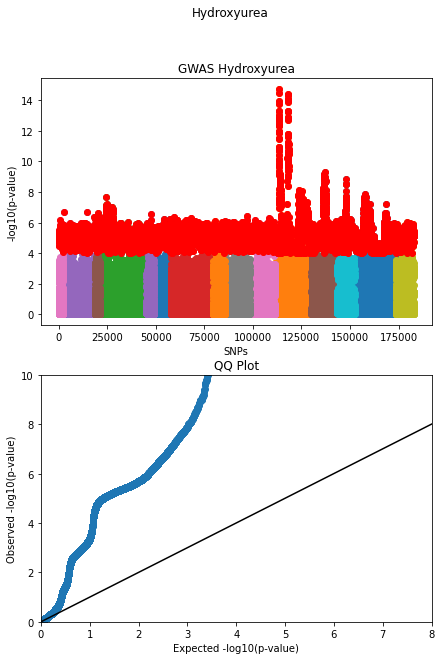

In [57]:
#split columns on any number of spaces 
gwas_hydroxyu = pd.read_csv("plink.Hydroxyurea.assoc.linear", sep="\s+")
gwas_hydroxyu['logP'] = -1 * np.log10(gwas_hydroxyu['P'])
gwas_hydroxyu['snp_index'] = range(len(gwas_hydroxyu))

# convert to dataframe
df_gwas_hydroxyu = pd.DataFrame(data=gwas_hydroxyu)

# get significant SNPs
sig_hydroxyu = df_gwas_hydroxyu.query('P < 10e-5')

# sort
hydroxyu_sorted = df_gwas_hydroxyu.sort_values(by = "P")
hydroxyu_sorted['uniform_points'] = range(0, len(hydroxyu_sorted))
hydroxyu_sorted['uniform_pval'] = (hydroxyu_sorted['uniform_points'] + 1) / len(hydroxyu_sorted)
hydroxyu_sorted['uniform_logP'] = -1 * np.log10(hydroxyu_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_hydroxyu['snp_index'] = range(len(df_gwas_hydroxyu))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Hydroxyurea")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_hydroxyu["snp_index"][df_gwas_hydroxyu["CHR"]==i], df_gwas_hydroxyu["logP"][df_gwas_hydroxyu["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_hydroxyu["snp_index"][sig_hydroxyu["CHR"]==i], sig_hydroxyu["logP"][sig_hydroxyu["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Hydroxyurea")

for plot in range(1,2):
    ax[plot].scatter(hydroxyu_sorted["uniform_logP"], hydroxyu_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Indoleacetic Acid

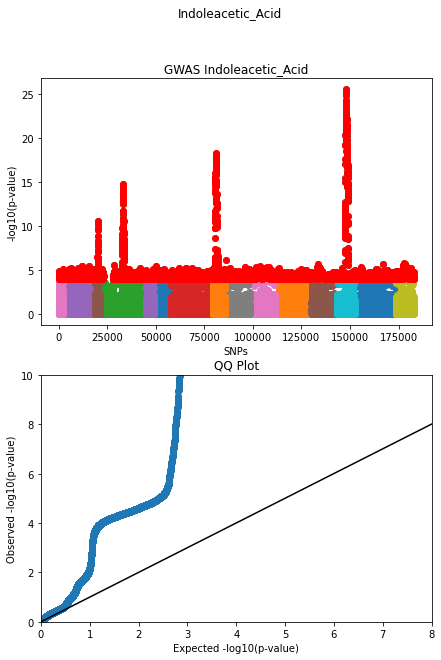

In [58]:
#split columns on any number of spaces 
gwas_indol = pd.read_csv("plink.Indoleacetic_Acid.assoc.linear", sep="\s+")
gwas_indol['logP'] = -1 * np.log10(gwas_indol['P'])
gwas_indol['snp_index'] = range(len(gwas_indol))

# convert to dataframe
df_gwas_indol = pd.DataFrame(data=gwas_indol)

# get significant SNPs
sig_indol = df_gwas_indol.query('P < 10e-5')

# sort
indol_sorted = df_gwas_indol.sort_values(by = "P")
indol_sorted['uniform_points'] = range(0, len(indol_sorted))
indol_sorted['uniform_pval'] = (indol_sorted['uniform_points'] + 1) / len(indol_sorted)
indol_sorted['uniform_logP'] = -1 * np.log10(indol_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_indol['snp_index'] = range(len(df_gwas_indol))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Indoleacetic_Acid")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_indol["snp_index"][df_gwas_indol["CHR"]==i], df_gwas_indol["logP"][df_gwas_indol["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_indol["snp_index"][sig_indol["CHR"]==i], sig_indol["logP"][sig_indol["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Indoleacetic_Acid")

for plot in range(1,2):
    ax[plot].scatter(indol_sorted["uniform_logP"], indol_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Lactate

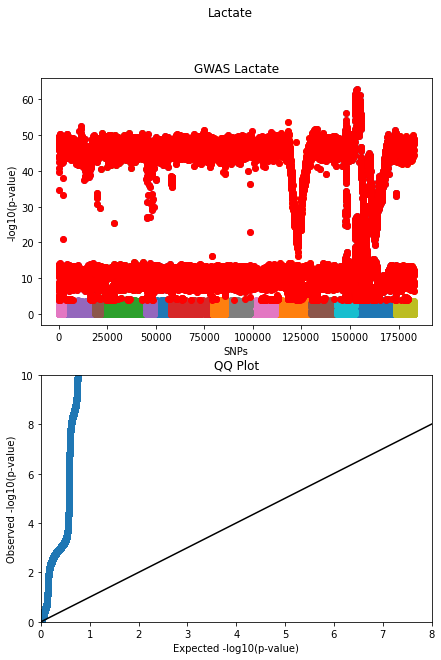

In [59]:
#split columns on any number of spaces 
gwas_lactate = pd.read_csv("plink.Lactate.assoc.linear", sep="\s+")
gwas_lactate['logP'] = -1 * np.log10(gwas_lactate['P'])
gwas_lactate['snp_index'] = range(len(gwas_lactate))

# convert to dataframe
df_gwas_lactate = pd.DataFrame(data=gwas_lactate)

# get significant SNPs
sig_lactate = df_gwas_lactate.query('P < 10e-5')

# sort
lactate_sorted = df_gwas_lactate.sort_values(by = "P")
lactate_sorted['uniform_points'] = range(0, len(lactate_sorted))
lactate_sorted['uniform_pval'] = (lactate_sorted['uniform_points'] + 1) / len(lactate_sorted)
lactate_sorted['uniform_logP'] = -1 * np.log10(lactate_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_lactate['snp_index'] = range(len(df_gwas_lactate))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Lactate")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_lactate["snp_index"][df_gwas_lactate["CHR"]==i], df_gwas_lactate["logP"][df_gwas_lactate["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_lactate["snp_index"][sig_lactate["CHR"]==i], sig_lactate["logP"][sig_lactate["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Lactate")

for plot in range(1,2):
    ax[plot].scatter(lactate_sorted["uniform_logP"], lactate_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Lactose

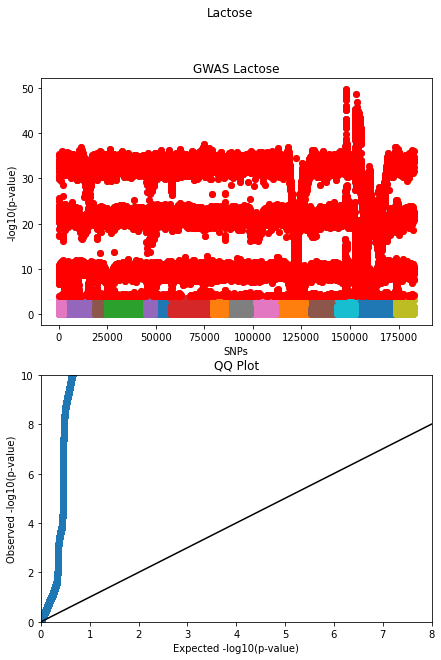

In [60]:
#split columns on any number of spaces 
gwas_lactose = pd.read_csv("plink.Lactose.assoc.linear", sep="\s+")
gwas_lactose['logP'] = -1 * np.log10(gwas_lactose['P'])
gwas_lactose['snp_index'] = range(len(gwas_lactose))

# convert to dataframe
df_gwas_lactose = pd.DataFrame(data=gwas_lactose)

# get significant SNPs
sig_lactose = df_gwas_lactose.query('P < 10e-5')

# sort
lactose_sorted = df_gwas_lactose.sort_values(by = "P")
lactose_sorted['uniform_points'] = range(0, len(lactose_sorted))
lactose_sorted['uniform_pval'] = (lactose_sorted['uniform_points'] + 1) / len(lactose_sorted)
lactose_sorted['uniform_logP'] = -1 * np.log10(lactose_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_lactose['snp_index'] = range(len(df_gwas_lactose))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Lactose")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_lactose["snp_index"][df_gwas_lactose["CHR"]==i], df_gwas_lactose["logP"][df_gwas_lactose["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_lactose["snp_index"][sig_lactose["CHR"]==i], sig_lactose["logP"][sig_lactose["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Lactose")

for plot in range(1,2):
    ax[plot].scatter(lactose_sorted["uniform_logP"], lactose_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

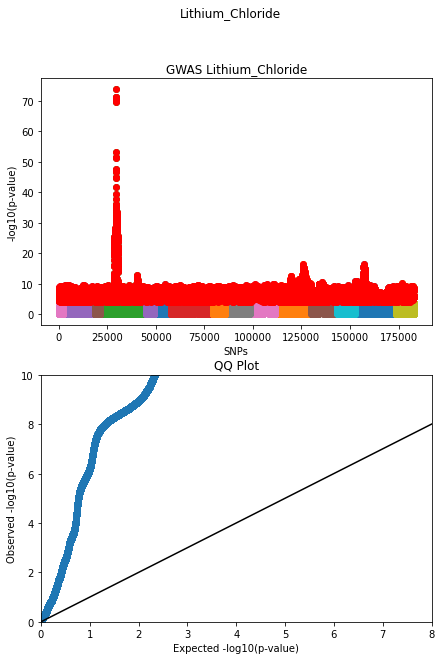

In [61]:
#split columns on any number of spaces 
gwas_lith_chlor = pd.read_csv("plink.Lithium_Chloride.assoc.linear", sep="\s+")
gwas_lith_chlor['logP'] = -1 * np.log10(gwas_lith_chlor['P'])
gwas_lith_chlor['snp_index'] = range(len(gwas_lith_chlor))

# convert to dataframe
df_gwas_lith_chlor = pd.DataFrame(data=gwas_lith_chlor)

# get significant SNPs
sig_lith_chlor = df_gwas_lith_chlor.query('P < 10e-5')

# sort
lith_chlor_sorted = df_gwas_lith_chlor.sort_values(by = "P")
lith_chlor_sorted['uniform_points'] = range(0, len(lith_chlor_sorted))
lith_chlor_sorted['uniform_pval'] = (lith_chlor_sorted['uniform_points'] + 1) / len(lith_chlor_sorted)
lith_chlor_sorted['uniform_logP'] = -1 * np.log10(lith_chlor_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_lith_chlor['snp_index'] = range(len(df_gwas_lith_chlor))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Lithium_Chloride")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_lith_chlor["snp_index"][df_gwas_lith_chlor["CHR"]==i], df_gwas_lith_chlor["logP"][df_gwas_lith_chlor["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_lith_chlor["snp_index"][sig_lith_chlor["CHR"]==i], sig_lith_chlor["logP"][sig_lith_chlor["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Lithium_Chloride")

for plot in range(1,2):
    ax[plot].scatter(lith_chlor_sorted["uniform_logP"], lith_chlor_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Magnesium Chloride

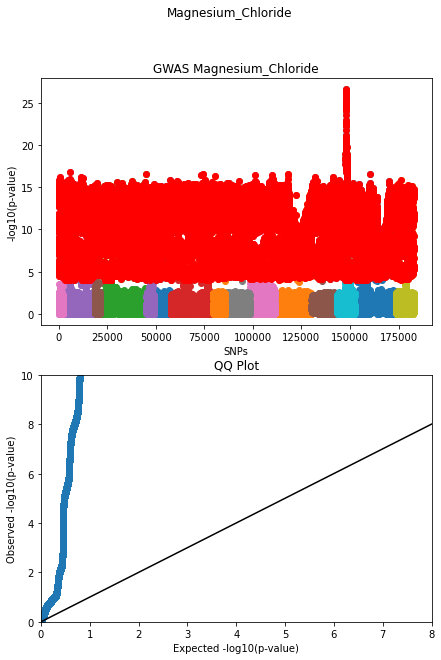

In [62]:
#split columns on any number of spaces 
gwas_mag_chlor = pd.read_csv("plink.Magnesium_Chloride.assoc.linear", sep="\s+")
gwas_mag_chlor['logP'] = -1 * np.log10(gwas_mag_chlor['P'])
gwas_mag_chlor['snp_index'] = range(len(gwas_mag_chlor))

# convert to dataframe
df_gwas_mag_chlor = pd.DataFrame(data=gwas_mag_chlor)

# get significant SNPs
sig_mag_chlor = df_gwas_mag_chlor.query('P < 10e-5')

# sort
mag_chlor_sorted = df_gwas_mag_chlor.sort_values(by = "P")
mag_chlor_sorted['uniform_points'] = range(0, len(mag_chlor_sorted))
mag_chlor_sorted['uniform_pval'] = (mag_chlor_sorted['uniform_points'] + 1) / len(mag_chlor_sorted)
mag_chlor_sorted['uniform_logP'] = -1 * np.log10(mag_chlor_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_mag_chlor['snp_index'] = range(len(df_gwas_mag_chlor))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Magnesium_Chloride")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_mag_chlor["snp_index"][df_gwas_mag_chlor["CHR"]==i], df_gwas_mag_chlor["logP"][df_gwas_mag_chlor["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_mag_chlor["snp_index"][sig_mag_chlor["CHR"]==i], sig_mag_chlor["logP"][sig_mag_chlor["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Magnesium_Chloride")

for plot in range(1,2):
    ax[plot].scatter(mag_chlor_sorted["uniform_logP"], mag_chlor_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Magnesium Sulfate

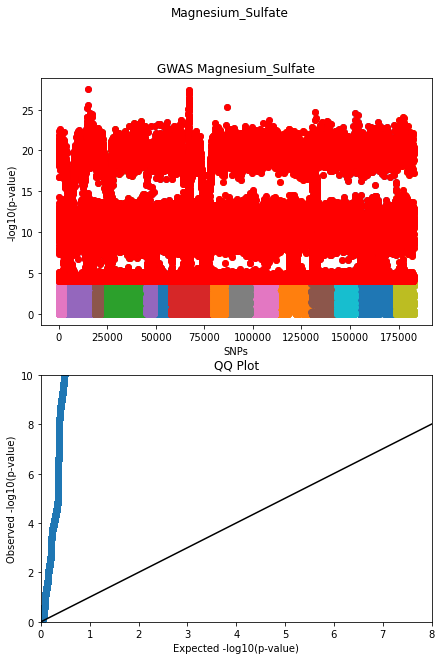

In [63]:
#split columns on any number of spaces 
gwas_mag_sulf = pd.read_csv("plink.Magnesium_Sulfate.assoc.linear", sep="\s+")
gwas_mag_sulf['logP'] = -1 * np.log10(gwas_mag_sulf['P'])
gwas_mag_sulf['snp_index'] = range(len(gwas_mag_sulf))

# convert to dataframe
df_gwas_mag_sulf = pd.DataFrame(data=gwas_mag_sulf)

# get significant SNPs
sig_mag_sulf = df_gwas_mag_sulf.query('P < 10e-5')

# sort
mag_sulf_sorted = df_gwas_mag_sulf.sort_values(by = "P")
mag_sulf_sorted['uniform_points'] = range(0, len(mag_sulf_sorted))
mag_sulf_sorted['uniform_pval'] = (mag_sulf_sorted['uniform_points'] + 1) / len(mag_sulf_sorted)
mag_sulf_sorted['uniform_logP'] = -1 * np.log10(mag_sulf_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_mag_sulf['snp_index'] = range(len(df_gwas_mag_sulf))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Magnesium_Sulfate")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_mag_sulf["snp_index"][df_gwas_mag_sulf["CHR"]==i], df_gwas_mag_sulf["logP"][df_gwas_mag_sulf["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_mag_sulf["snp_index"][sig_mag_sulf["CHR"]==i], sig_mag_sulf["logP"][sig_mag_sulf["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Magnesium_Sulfate")

for plot in range(1,2):
    ax[plot].scatter(mag_sulf_sorted["uniform_logP"], mag_sulf_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Maltose

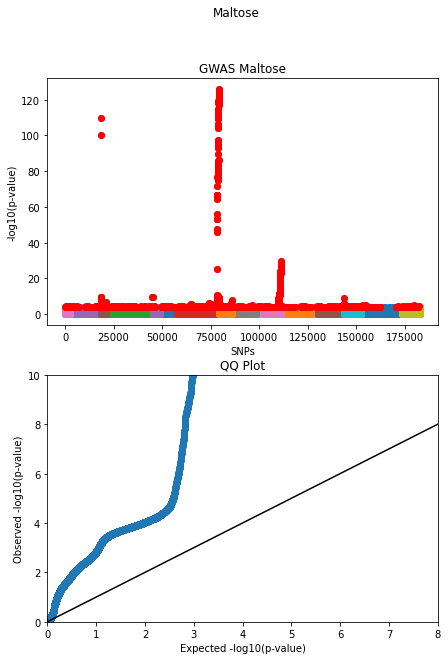

In [66]:
#split columns on any number of spaces 
gwas_malt = pd.read_csv("plink.Maltose.assoc.linear", sep="\s+")
gwas_malt['logP'] = -1 * np.log10(gwas_malt['P'])
gwas_malt['snp_index'] = range(len(gwas_malt))

# convert to dataframe
df_gwas_malt = pd.DataFrame(data=gwas_malt)

# get significant SNPs
sig_malt = df_gwas_malt.query('P < 10e-5')

# sort
malt_sorted = df_gwas_malt.sort_values(by = "P")
malt_sorted['uniform_points'] = range(0, len(malt_sorted))
malt_sorted['uniform_pval'] = (malt_sorted['uniform_points'] + 1) / len(malt_sorted)
malt_sorted['uniform_logP'] = -1 * np.log10(malt_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_malt['snp_index'] = range(len(df_gwas_malt))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Maltose")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_malt["snp_index"][df_gwas_malt["CHR"]==i], df_gwas_malt["logP"][df_gwas_malt["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_malt["snp_index"][sig_malt["CHR"]==i], sig_malt["logP"][sig_malt["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Maltose")

for plot in range(1,2):
    ax[plot].scatter(malt_sorted["uniform_logP"], malt_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Mannose

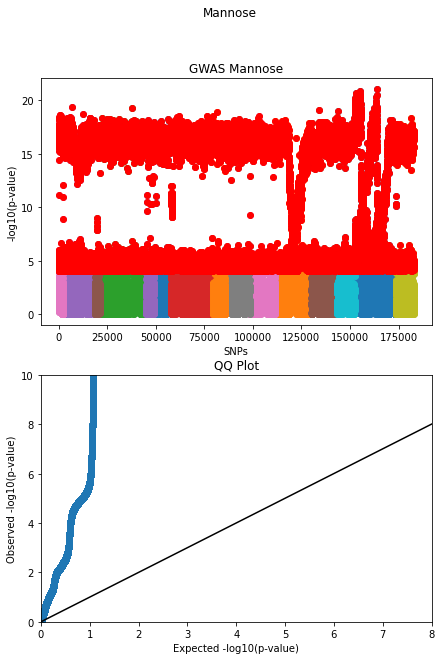

In [67]:
#split columns on any number of spaces 
gwas_mannose = pd.read_csv("plink.Mannose.assoc.linear", sep="\s+")
gwas_mannose['logP'] = -1 * np.log10(gwas_mannose['P'])
gwas_mannose['snp_index'] = range(len(gwas_mannose))

# convert to dataframe
df_gwas_mannose = pd.DataFrame(data=gwas_mannose)

# get significant SNPs
sig_mannose = df_gwas_mannose.query('P < 10e-5')

# sort
mannose_sorted = df_gwas_mannose.sort_values(by = "P")
mannose_sorted['uniform_points'] = range(0, len(mannose_sorted))
mannose_sorted['uniform_pval'] = (mannose_sorted['uniform_points'] + 1) / len(mannose_sorted)
mannose_sorted['uniform_logP'] = -1 * np.log10(mannose_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_mannose['snp_index'] = range(len(df_gwas_mannose))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Mannose")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_mannose["snp_index"][df_gwas_mannose["CHR"]==i], df_gwas_mannose["logP"][df_gwas_mannose["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_mannose["snp_index"][sig_mannose["CHR"]==i], sig_mannose["logP"][sig_mannose["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Mannose")

for plot in range(1,2):
    ax[plot].scatter(mannose_sorted["uniform_logP"], mannose_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Menadione

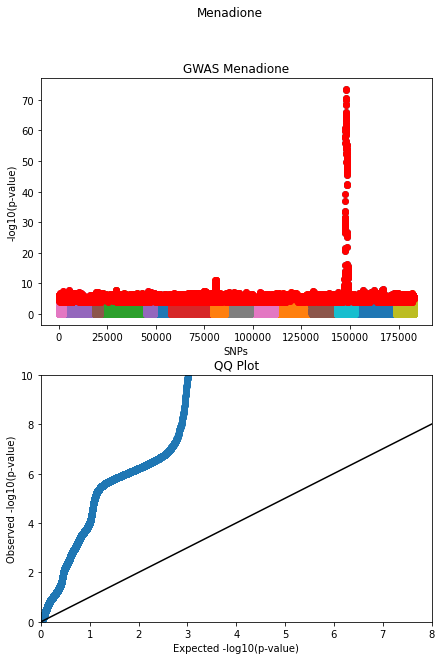

In [68]:
#split columns on any number of spaces 
gwas_menadione = pd.read_csv("plink.Menadione.assoc.linear", sep="\s+")
gwas_menadione['logP'] = -1 * np.log10(gwas_menadione['P'])
gwas_menadione['snp_index'] = range(len(gwas_menadione))

# convert to dataframe
df_gwas_menadione = pd.DataFrame(data=gwas_menadione)

# get significant SNPs
sig_menadione = df_gwas_menadione.query('P < 10e-5')

# sort
menadione_sorted = df_gwas_menadione.sort_values(by = "P")
menadione_sorted['uniform_points'] = range(0, len(menadione_sorted))
menadione_sorted['uniform_pval'] = (menadione_sorted['uniform_points'] + 1) / len(menadione_sorted)
menadione_sorted['uniform_logP'] = -1 * np.log10(menadione_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_menadione['snp_index'] = range(len(df_gwas_menadione))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Menadione")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_menadione["snp_index"][df_gwas_menadione["CHR"]==i], df_gwas_menadione["logP"][df_gwas_menadione["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_menadione["snp_index"][sig_menadione["CHR"]==i], sig_menadione["logP"][sig_menadione["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Menadione")

for plot in range(1,2):
    ax[plot].scatter(menadione_sorted["uniform_logP"], menadione_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Neomycin

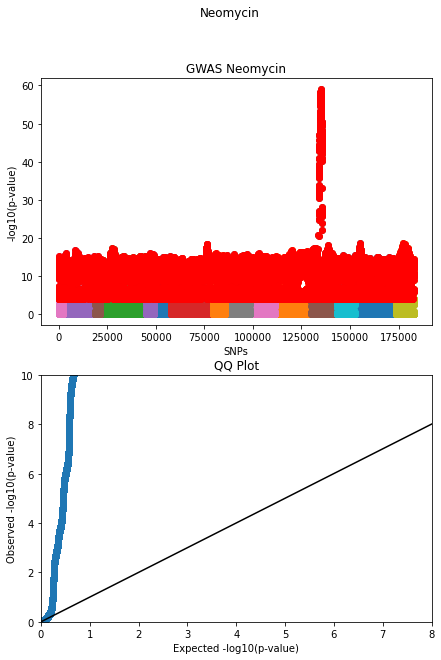

In [69]:
#split columns on any number of spaces 
gwas_neomycin = pd.read_csv("plink.Neomycin.assoc.linear", sep="\s+")
gwas_neomycin['logP'] = -1 * np.log10(gwas_neomycin['P'])
gwas_neomycin['snp_index'] = range(len(gwas_neomycin))

# convert to dataframe
df_gwas_neomycin = pd.DataFrame(data=gwas_neomycin)

# get significant SNPs
sig_neomycin = df_gwas_neomycin.query('P < 10e-5')

# sort
neomycin_sorted = df_gwas_neomycin.sort_values(by = "P")
neomycin_sorted['uniform_points'] = range(0, len(neomycin_sorted))
neomycin_sorted['uniform_pval'] = (neomycin_sorted['uniform_points'] + 1) / len(neomycin_sorted)
neomycin_sorted['uniform_logP'] = -1 * np.log10(neomycin_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_neomycin['snp_index'] = range(len(df_gwas_neomycin))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Neomycin")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_neomycin["snp_index"][df_gwas_neomycin["CHR"]==i], df_gwas_neomycin["logP"][df_gwas_neomycin["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_neomycin["snp_index"][sig_neomycin["CHR"]==i], sig_neomycin["logP"][sig_neomycin["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Neomycin")

for plot in range(1,2):
    ax[plot].scatter(neomycin_sorted["uniform_logP"], neomycin_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Paraquat

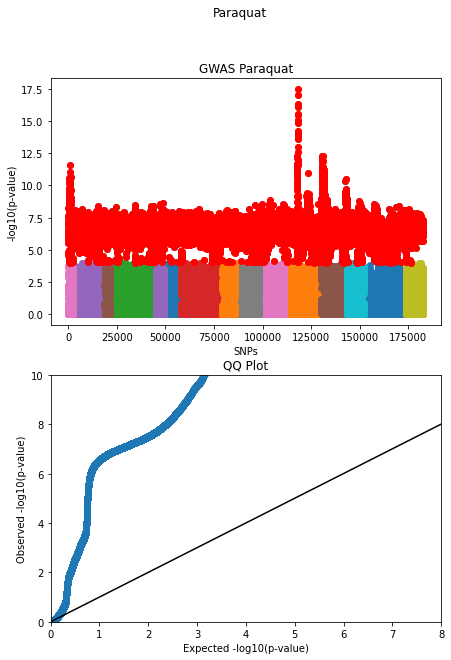

In [74]:
#split columns on any number of spaces 
gwas_paraquat = pd.read_csv("plink.Paraquat.assoc.linear", sep="\s+")
gwas_paraquat['logP'] = -1 * np.log10(gwas_paraquat['P'])
gwas_paraquat['snp_index'] = range(len(gwas_paraquat))

# convert to dataframe
df_gwas_paraquat = pd.DataFrame(data=gwas_paraquat)

# get significant SNPs
sig_paraquat = df_gwas_paraquat.query('P < 10e-5')

# sort
paraquat_sorted = df_gwas_paraquat.sort_values(by = "P")
paraquat_sorted['uniform_points'] = range(0, len(paraquat_sorted))
paraquat_sorted['uniform_pval'] = (paraquat_sorted['uniform_points'] + 1) / len(paraquat_sorted)
paraquat_sorted['uniform_logP'] = -1 * np.log10(paraquat_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_paraquat['snp_index'] = range(len(df_gwas_paraquat))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Paraquat")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_paraquat["snp_index"][df_gwas_paraquat["CHR"]==i], df_gwas_paraquat["logP"][df_gwas_paraquat["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_paraquat["snp_index"][sig_paraquat["CHR"]==i], sig_paraquat["logP"][sig_paraquat["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Paraquat")

for plot in range(1,2):
    ax[plot].scatter(paraquat_sorted["uniform_logP"], paraquat_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Raffinose

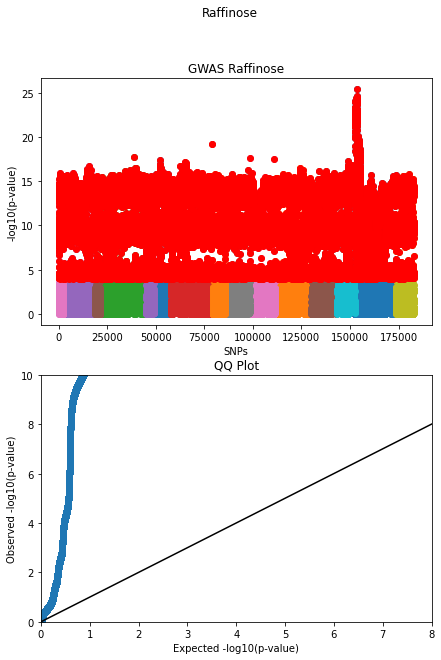

In [83]:
#split columns on any number of spaces 
gwas_raff = pd.read_csv("plink.Raffinose.assoc.linear", sep="\s+")
gwas_raff['logP'] = -1 * np.log10(gwas_raff['P'])
gwas_raff['snp_index'] = range(len(gwas_raff))

# convert to dataframe
df_gwas_raff = pd.DataFrame(data=gwas_raff)

# get significant SNPs
sig_raff = df_gwas_raff.query('P < 10e-5')

# sort
raff_sorted = df_gwas_raff.sort_values(by = "P")
raff_sorted['uniform_points'] = range(0, len(raff_sorted))
raff_sorted['uniform_pval'] = (raff_sorted['uniform_points'] + 1) / len(raff_sorted)
raff_sorted['uniform_logP'] = -1 * np.log10(raff_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_raff['snp_index'] = range(len(df_gwas_raff))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Raffinose")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_raff["snp_index"][df_gwas_raff["CHR"]==i], df_gwas_raff["logP"][df_gwas_raff["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_raff["snp_index"][sig_raff["CHR"]==i], sig_raff["logP"][sig_raff["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Raffinose")

for plot in range(1,2):
    ax[plot].scatter(raff_sorted["uniform_logP"], raff_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### SDS

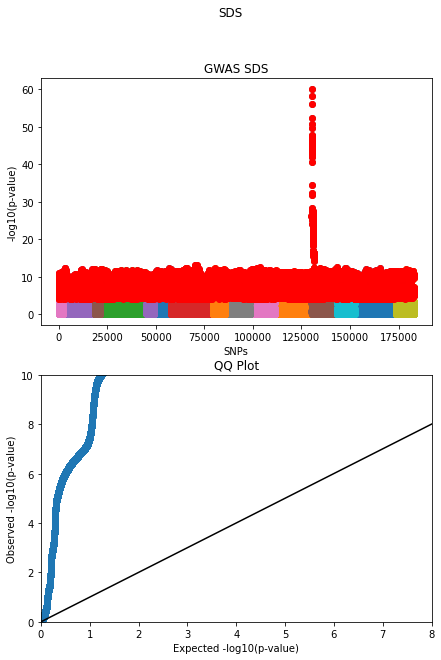

In [84]:
#split columns on any number of spaces 
gwas_SDS = pd.read_csv("plink.SDS.assoc.linear", sep="\s+")
gwas_SDS['logP'] = -1 * np.log10(gwas_SDS['P'])
gwas_SDS['snp_index'] = range(len(gwas_SDS))

# convert to dataframe
df_gwas_SDS = pd.DataFrame(data=gwas_SDS)

# get significant SNPs
sig_SDS = df_gwas_SDS.query('P < 10e-5')

# sort
SDS_sorted = df_gwas_SDS.sort_values(by = "P")
SDS_sorted['uniform_points'] = range(0, len(SDS_sorted))
SDS_sorted['uniform_pval'] = (SDS_sorted['uniform_points'] + 1) / len(SDS_sorted)
SDS_sorted['uniform_logP'] = -1 * np.log10(SDS_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_SDS['snp_index'] = range(len(df_gwas_SDS))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("SDS")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_SDS["snp_index"][df_gwas_SDS["CHR"]==i], df_gwas_SDS["logP"][df_gwas_SDS["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_SDS["snp_index"][sig_SDS["CHR"]==i], sig_SDS["logP"][sig_SDS["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS SDS")

for plot in range(1,2):
    ax[plot].scatter(SDS_sorted["uniform_logP"], SDS_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Sorbitol

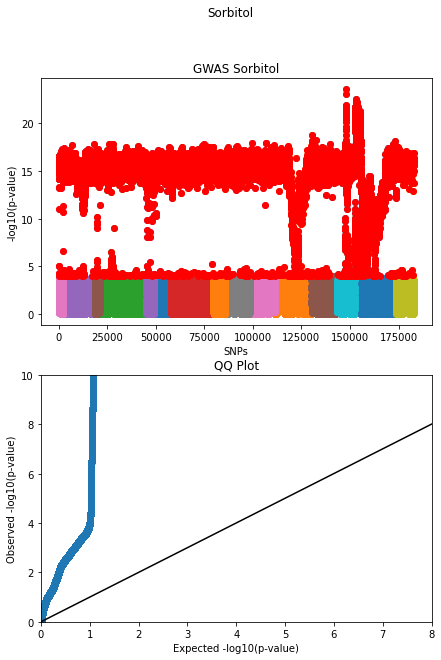

In [85]:
#split columns on any number of spaces 
gwas_sorbitol = pd.read_csv("plink.Sorbitol.assoc.linear", sep="\s+")
gwas_sorbitol['logP'] = -1 * np.log10(gwas_sorbitol['P'])
gwas_sorbitol['snp_index'] = range(len(gwas_sorbitol))

# convert to dataframe
df_gwas_sorbitol = pd.DataFrame(data=gwas_sorbitol)

# get significant SNPs
sig_sorbitol = df_gwas_sorbitol.query('P < 10e-5')

# sort
sorbitol_sorted = df_gwas_sorbitol.sort_values(by = "P")
sorbitol_sorted['uniform_points'] = range(0, len(sorbitol_sorted))
sorbitol_sorted['uniform_pval'] = (sorbitol_sorted['uniform_points'] + 1) / len(sorbitol_sorted)
sorbitol_sorted['uniform_logP'] = -1 * np.log10(sorbitol_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_sorbitol['snp_index'] = range(len(df_gwas_sorbitol))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Sorbitol")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_sorbitol["snp_index"][df_gwas_sorbitol["CHR"]==i], df_gwas_sorbitol["logP"][df_gwas_sorbitol["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_sorbitol["snp_index"][sig_sorbitol["CHR"]==i], sig_sorbitol["logP"][sig_sorbitol["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Sorbitol")

for plot in range(1,2):
    ax[plot].scatter(sorbitol_sorted["uniform_logP"], sorbitol_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Trehalose

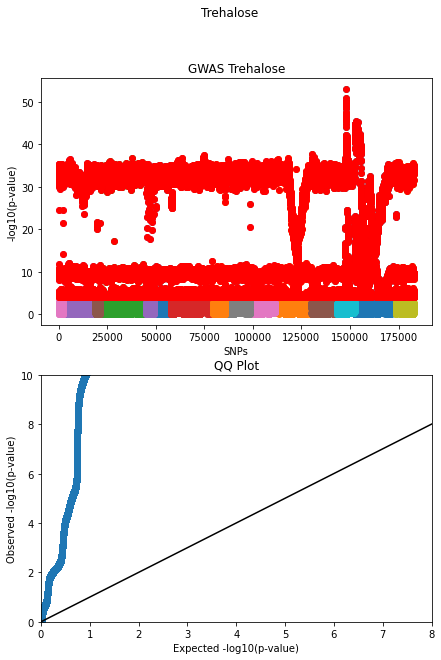

In [87]:
#split columns on any number of spaces 
gwas_trehalose = pd.read_csv("plink.Trehalose.assoc.linear", sep="\s+")
gwas_trehalose['logP'] = -1 * np.log10(gwas_trehalose['P'])
gwas_trehalose['snp_index'] = range(len(gwas_trehalose))

# convert to dataframe
df_gwas_trehalose = pd.DataFrame(data=gwas_trehalose)

# get significant SNPs
sig_trehalose = df_gwas_trehalose.query('P < 10e-5')

# sort
trehalose_sorted = df_gwas_trehalose.sort_values(by = "P")
trehalose_sorted['uniform_points'] = range(0, len(trehalose_sorted))
trehalose_sorted['uniform_pval'] = (trehalose_sorted['uniform_points'] + 1) / len(trehalose_sorted)
trehalose_sorted['uniform_logP'] = -1 * np.log10(trehalose_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_trehalose['snp_index'] = range(len(df_gwas_trehalose))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Trehalose")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_trehalose["snp_index"][df_gwas_trehalose["CHR"]==i], df_gwas_trehalose["logP"][df_gwas_trehalose["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_trehalose["snp_index"][sig_trehalose["CHR"]==i], sig_trehalose["logP"][sig_trehalose["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Trehalose")

for plot in range(1,2):
    ax[plot].scatter(trehalose_sorted["uniform_logP"], trehalose_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Tunicamycin

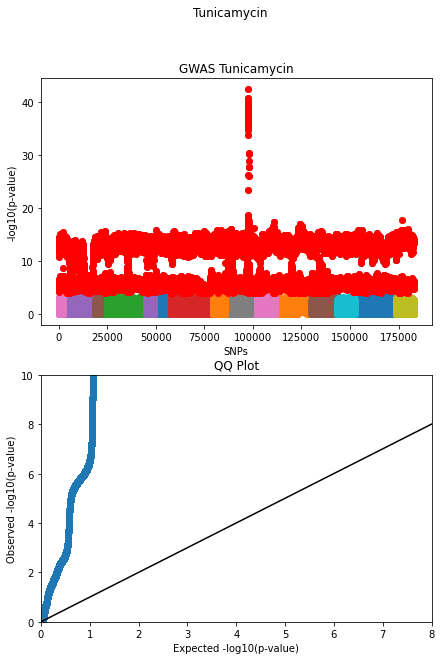

In [88]:
#split columns on any number of spaces 
gwas_tuni = pd.read_csv("plink.Tunicamycin.assoc.linear", sep="\s+")
gwas_tuni['logP'] = -1 * np.log10(gwas_tuni['P'])
gwas_tuni['snp_index'] = range(len(gwas_tuni))

# convert to dataframe
df_gwas_tuni = pd.DataFrame(data=gwas_tuni)

# get significant SNPs
sig_tuni = df_gwas_tuni.query('P < 10e-5')

# sort
tuni_sorted = df_gwas_tuni.sort_values(by = "P")
tuni_sorted['uniform_points'] = range(0, len(tuni_sorted))
tuni_sorted['uniform_pval'] = (tuni_sorted['uniform_points'] + 1) / len(tuni_sorted)
tuni_sorted['uniform_logP'] = -1 * np.log10(tuni_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_tuni['snp_index'] = range(len(df_gwas_tuni))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Tunicamycin")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_tuni["snp_index"][df_gwas_tuni["CHR"]==i], df_gwas_tuni["logP"][df_gwas_tuni["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_tuni["snp_index"][sig_tuni["CHR"]==i], sig_tuni["logP"][sig_tuni["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Tunicamycin")

for plot in range(1,2):
    ax[plot].scatter(tuni_sorted["uniform_logP"], tuni_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### x4-Hydroxybenzaldehyde

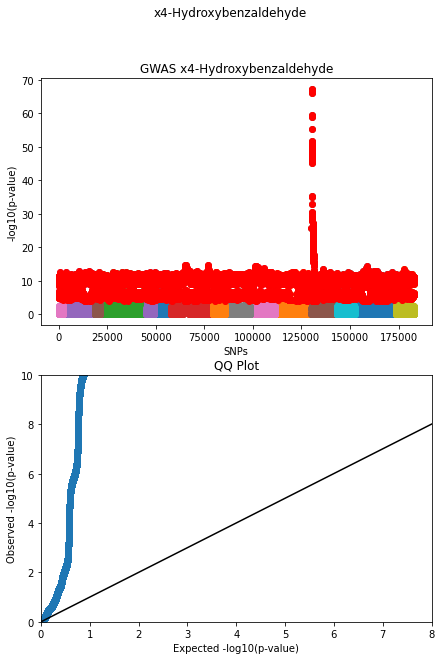

In [89]:
#split columns on any number of spaces 
gwas_x4hydroxy = pd.read_csv("plink.x4-Hydroxybenzaldehyde.assoc.linear", sep="\s+")
gwas_x4hydroxy['logP'] = -1 * np.log10(gwas_x4hydroxy['P'])
gwas_x4hydroxy['snp_index'] = range(len(gwas_x4hydroxy))

# convert to dataframe
df_gwas_x4hydroxy = pd.DataFrame(data=gwas_x4hydroxy)

# get significant SNPs
sig_x4hydroxy = df_gwas_x4hydroxy.query('P < 10e-5')

# sort
x4hydroxy_sorted = df_gwas_x4hydroxy.sort_values(by = "P")
x4hydroxy_sorted['uniform_points'] = range(0, len(x4hydroxy_sorted))
x4hydroxy_sorted['uniform_pval'] = (x4hydroxy_sorted['uniform_points'] + 1) / len(x4hydroxy_sorted)
x4hydroxy_sorted['uniform_logP'] = -1 * np.log10(x4hydroxy_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_x4hydroxy['snp_index'] = range(len(df_gwas_x4hydroxy))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("x4-Hydroxybenzaldehyde")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_x4hydroxy["snp_index"][df_gwas_x4hydroxy["CHR"]==i], df_gwas_x4hydroxy["logP"][df_gwas_x4hydroxy["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_x4hydroxy["snp_index"][sig_x4hydroxy["CHR"]==i], sig_x4hydroxy["logP"][sig_x4hydroxy["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS x4-Hydroxybenzaldehyde")

for plot in range(1,2):
    ax[plot].scatter(x4hydroxy_sorted["uniform_logP"], x4hydroxy_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### x4NQO

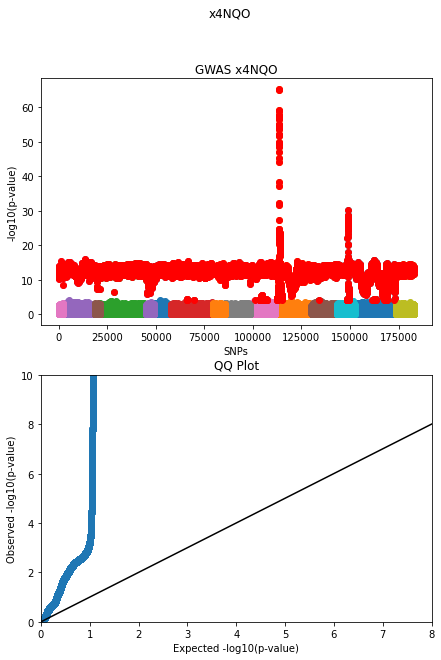

In [90]:
#split columns on any number of spaces 
gwas_x4NQO = pd.read_csv("plink.x4NQO.assoc.linear", sep="\s+")
gwas_x4NQO['logP'] = -1 * np.log10(gwas_x4NQO['P'])
gwas_x4NQO['snp_index'] = range(len(gwas_x4NQO))

# convert to dataframe
df_gwas_x4NQO = pd.DataFrame(data=gwas_x4NQO)

# get significant SNPs
sig_x4NQO = df_gwas_x4NQO.query('P < 10e-5')

# sort
x4NQO_sorted = df_gwas_x4NQO.sort_values(by = "P")
x4NQO_sorted['uniform_points'] = range(0, len(x4NQO_sorted))
x4NQO_sorted['uniform_pval'] = (x4NQO_sorted['uniform_points'] + 1) / len(x4NQO_sorted)
x4NQO_sorted['uniform_logP'] = -1 * np.log10(x4NQO_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_x4NQO['snp_index'] = range(len(df_gwas_x4NQO))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("x4NQO")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_x4NQO["snp_index"][df_gwas_x4NQO["CHR"]==i], df_gwas_x4NQO["logP"][df_gwas_x4NQO["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_x4NQO["snp_index"][sig_x4NQO["CHR"]==i], sig_x4NQO["logP"][sig_x4NQO["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS x4NQO")

for plot in range(1,2):
    ax[plot].scatter(x4NQO_sorted["uniform_logP"], x4NQO_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### x5-Fluorocytosine

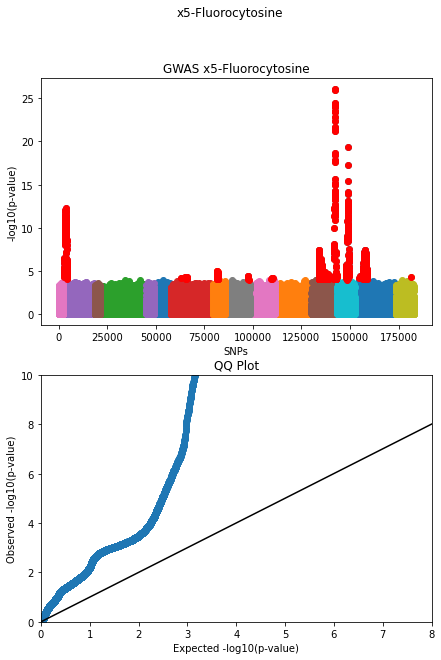

In [91]:
#split columns on any number of spaces 
gwas_x5fluoro = pd.read_csv("plink.x5-Fluorocytosine.assoc.linear", sep="\s+")
gwas_x5fluoro['logP'] = -1 * np.log10(gwas_x5fluoro['P'])
gwas_x5fluoro['snp_index'] = range(len(gwas_x5fluoro))

# convert to dataframe
df_gwas_x5fluoro = pd.DataFrame(data=gwas_x5fluoro)

# get significant SNPs
sig_x5fluoro = df_gwas_x5fluoro.query('P < 10e-5')

# sort
x5fluoro_sorted = df_gwas_x5fluoro.sort_values(by = "P")
x5fluoro_sorted['uniform_points'] = range(0, len(x5fluoro_sorted))
x5fluoro_sorted['uniform_pval'] = (x5fluoro_sorted['uniform_points'] + 1) / len(x5fluoro_sorted)
x5fluoro_sorted['uniform_logP'] = -1 * np.log10(x5fluoro_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_x5fluoro['snp_index'] = range(len(df_gwas_x5fluoro))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("x5-Fluorocytosine")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_x5fluoro["snp_index"][df_gwas_x5fluoro["CHR"]==i], df_gwas_x5fluoro["logP"][df_gwas_x5fluoro["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_x5fluoro["snp_index"][sig_x5fluoro["CHR"]==i], sig_x5fluoro["logP"][sig_x5fluoro["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS x5-Fluorocytosine")

for plot in range(1,2):
    ax[plot].scatter(x5fluoro_sorted["uniform_logP"], x5fluoro_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### x5-Fluorouracil

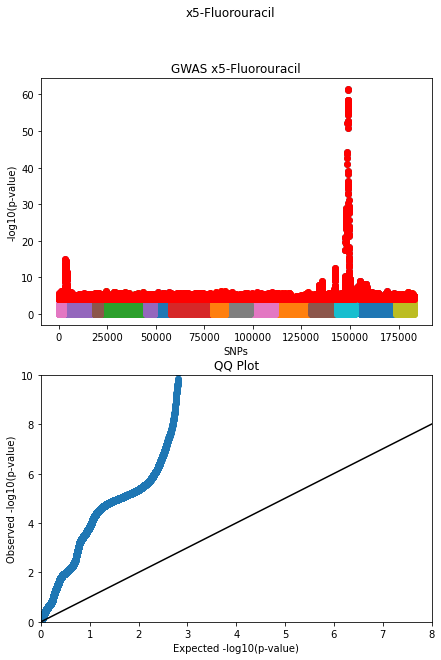

In [92]:
#split columns on any number of spaces 
gwas_x5fluorouracil = pd.read_csv("plink.x5-Fluorouracil.assoc.linear", sep="\s+")
gwas_x5fluorouracil['logP'] = -1 * np.log10(gwas_x5fluorouracil['P'])
gwas_x5fluorouracil['snp_index'] = range(len(gwas_x5fluorouracil))

# convert to dataframe
df_gwas_x5fluorouracil = pd.DataFrame(data=gwas_x5fluorouracil)

# get significant SNPs
sig_x5fluorouracil = df_gwas_x5fluorouracil.query('P < 10e-5')

# sort
x5fluorouracil_sorted = df_gwas_x5fluorouracil.sort_values(by = "P")
x5fluorouracil_sorted['uniform_points'] = range(0, len(x5fluorouracil_sorted))
x5fluorouracil_sorted['uniform_pval'] = (x5fluorouracil_sorted['uniform_points'] + 1) / len(x5fluorouracil_sorted)
x5fluorouracil_sorted['uniform_logP'] = -1 * np.log10(x5fluorouracil_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_x5fluorouracil['snp_index'] = range(len(df_gwas_x5fluorouracil))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("x5-Fluorouracil")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_x5fluorouracil["snp_index"][df_gwas_x5fluorouracil["CHR"]==i], df_gwas_x5fluorouracil["logP"][df_gwas_x5fluorouracil["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_x5fluorouracil["snp_index"][sig_x5fluorouracil["CHR"]==i], sig_x5fluorouracil["logP"][sig_x5fluorouracil["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS x5-Fluorouracil")

for plot in range(1,2):
    ax[plot].scatter(x5fluorouracil_sorted["uniform_logP"], x5fluorouracil_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### x6-Azauracil

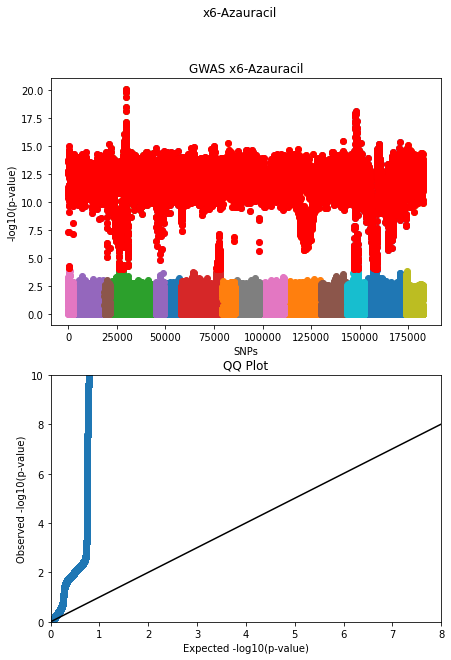

In [93]:
#split columns on any number of spaces 
gwas_x6aza = pd.read_csv("plink.x6-Azauracil.assoc.linear", sep="\s+")
gwas_x6aza['logP'] = -1 * np.log10(gwas_x6aza['P'])
gwas_x6aza['snp_index'] = range(len(gwas_x6aza))

# convert to dataframe
df_gwas_x6aza = pd.DataFrame(data=gwas_x6aza)

# get significant SNPs
sig_x6aza = df_gwas_x6aza.query('P < 10e-5')

# sort
x6aza_sorted = df_gwas_x6aza.sort_values(by = "P")
x6aza_sorted['uniform_points'] = range(0, len(x6aza_sorted))
x6aza_sorted['uniform_pval'] = (x6aza_sorted['uniform_points'] + 1) / len(x6aza_sorted)
x6aza_sorted['uniform_logP'] = -1 * np.log10(x6aza_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_x6aza['snp_index'] = range(len(df_gwas_x6aza))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("x6-Azauracil")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_x6aza["snp_index"][df_gwas_x6aza["CHR"]==i], df_gwas_x6aza["logP"][df_gwas_x6aza["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_x6aza["snp_index"][sig_x6aza["CHR"]==i], sig_x6aza["logP"][sig_x6aza["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS x6-Azauracil")

for plot in range(1,2):
    ax[plot].scatter(x6aza_sorted["uniform_logP"], x6aza_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Xylose

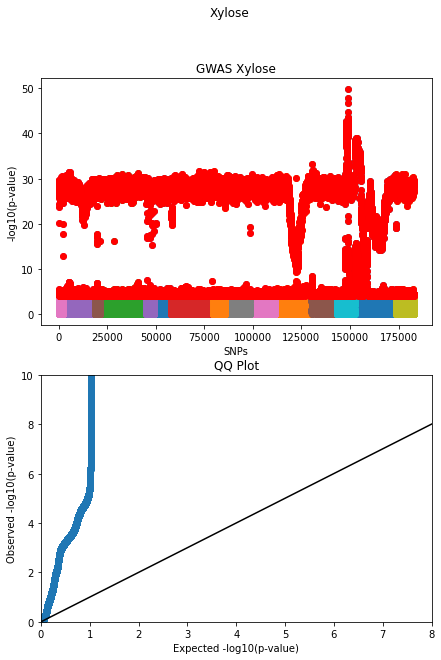

In [94]:
#split columns on any number of spaces 
gwas_xylose = pd.read_csv("plink.Xylose.assoc.linear", sep="\s+")
gwas_xylose['logP'] = -1 * np.log10(gwas_xylose['P'])
gwas_xylose['snp_index'] = range(len(gwas_xylose))

# convert to dataframe
df_gwas_xylose = pd.DataFrame(data=gwas_xylose)

# get significant SNPs
sig_xylose = df_gwas_xylose.query('P < 10e-5')

# sort
xylose_sorted = df_gwas_xylose.sort_values(by = "P")
xylose_sorted['uniform_points'] = range(0, len(xylose_sorted))
xylose_sorted['uniform_pval'] = (xylose_sorted['uniform_points'] + 1) / len(xylose_sorted)
xylose_sorted['uniform_logP'] = -1 * np.log10(xylose_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_xylose['snp_index'] = range(len(df_gwas_xylose))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Xylose")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_xylose["snp_index"][df_gwas_xylose["CHR"]==i], df_gwas_xylose["logP"][df_gwas_xylose["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_xylose["snp_index"][sig_xylose["CHR"]==i], sig_xylose["logP"][sig_xylose["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Xylose")

for plot in range(1,2):
    ax[plot].scatter(xylose_sorted["uniform_logP"], xylose_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### YNB

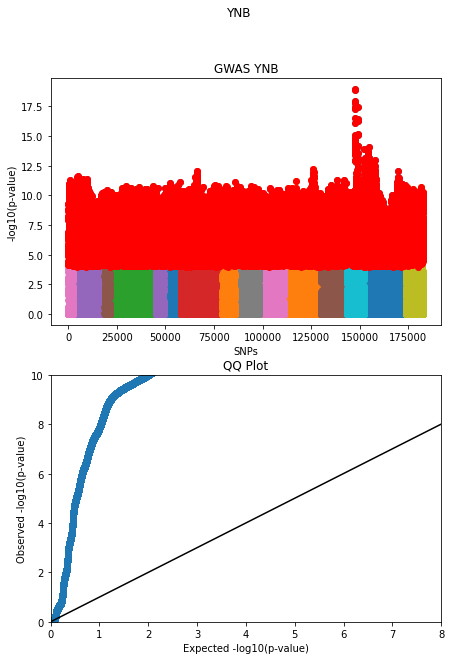

In [95]:
#split columns on any number of spaces 
gwas_ynb = pd.read_csv("plink.YNB.assoc.linear", sep="\s+")
gwas_ynb['logP'] = -1 * np.log10(gwas_ynb['P'])
gwas_ynb['snp_index'] = range(len(gwas_ynb))

# convert to dataframe
df_gwas_ynb = pd.DataFrame(data=gwas_ynb)

# get significant SNPs
sig_ynb = df_gwas_ynb.query('P < 10e-5')

# sort
ynb_sorted = df_gwas_ynb.sort_values(by = "P")
ynb_sorted['uniform_points'] = range(0, len(ynb_sorted))
ynb_sorted['uniform_pval'] = (ynb_sorted['uniform_points'] + 1) / len(ynb_sorted)
ynb_sorted['uniform_logP'] = -1 * np.log10(ynb_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_ynb['snp_index'] = range(len(df_gwas_ynb))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("YNB")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_ynb["snp_index"][df_gwas_ynb["CHR"]==i], df_gwas_ynb["logP"][df_gwas_ynb["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_ynb["snp_index"][sig_ynb["CHR"]==i], sig_ynb["logP"][sig_ynb["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS YNB")

for plot in range(1,2):
    ax[plot].scatter(ynb_sorted["uniform_logP"], ynb_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### YNB/ph3

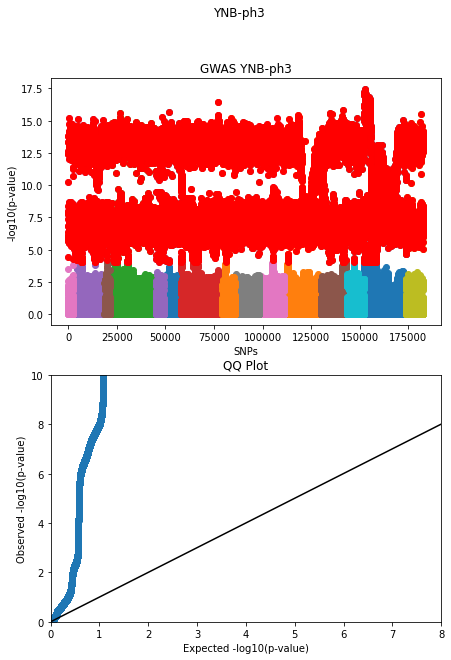

In [97]:
#split columns on any number of spaces 
gwas_ynbph3 = pd.read_csv("plink.YNB-ph3.assoc.linear", sep="\s+")
gwas_ynbph3['logP'] = -1 * np.log10(gwas_ynbph3['P'])
gwas_ynbph3['snp_index'] = range(len(gwas_ynbph3))

# convert to dataframe
df_gwas_ynbph3 = pd.DataFrame(data=gwas_ynbph3)

# get significant SNPs
sig_ynbph3 = df_gwas_ynbph3.query('P < 10e-5')

# sort
ynbph3_sorted = df_gwas_ynbph3.sort_values(by = "P")
ynbph3_sorted['uniform_points'] = range(0, len(ynbph3_sorted))
ynbph3_sorted['uniform_pval'] = (ynbph3_sorted['uniform_points'] + 1) / len(ynbph3_sorted)
ynbph3_sorted['uniform_logP'] = -1 * np.log10(ynbph3_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_ynbph3['snp_index'] = range(len(df_gwas_ynbph3))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("YNB-ph3")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_ynbph3["snp_index"][df_gwas_ynbph3["CHR"]==i], df_gwas_ynbph3["logP"][df_gwas_ynbph3["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_ynbph3["snp_index"][sig_ynbph3["CHR"]==i], sig_ynbph3["logP"][sig_ynbph3["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS YNB-ph3")

for plot in range(1,2):
    ax[plot].scatter(ynbph3_sorted["uniform_logP"], ynbph3_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### YNB/ph8

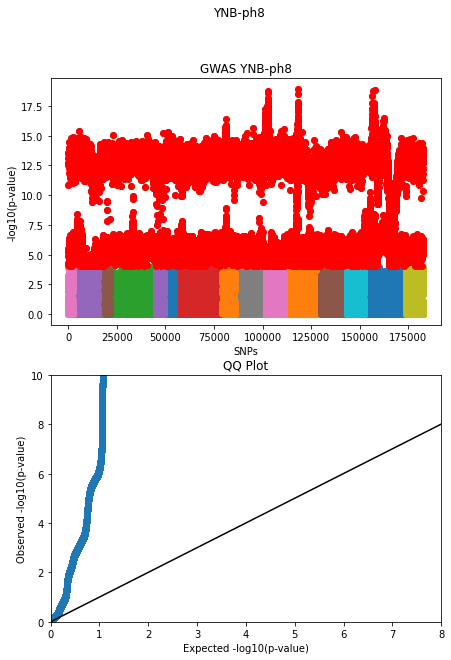

In [98]:
#split columns on any number of spaces 
gwas_ynbph8 = pd.read_csv("plink.YNB-ph8.assoc.linear", sep="\s+")
gwas_ynbph8['logP'] = -1 * np.log10(gwas_ynbph8['P'])
gwas_ynbph8['snp_index'] = range(len(gwas_ynbph8))

# convert to dataframe
df_gwas_ynbph8 = pd.DataFrame(data=gwas_ynbph8)

# get significant SNPs
sig_ynbph8 = df_gwas_ynbph8.query('P < 10e-5')

# sort
ynbph8_sorted = df_gwas_ynbph8.sort_values(by = "P")
ynbph8_sorted['uniform_points'] = range(0, len(ynbph8_sorted))
ynbph8_sorted['uniform_pval'] = (ynbph8_sorted['uniform_points'] + 1) / len(ynbph8_sorted)
ynbph8_sorted['uniform_logP'] = -1 * np.log10(ynbph8_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_ynbph8['snp_index'] = range(len(df_gwas_ynbph8))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("YNB-ph8")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_ynbph8["snp_index"][df_gwas_ynbph8["CHR"]==i], df_gwas_ynbph8["logP"][df_gwas_ynbph8["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_ynbph8["snp_index"][sig_ynbph8["CHR"]==i], sig_ynbph8["logP"][sig_ynbph8["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS YNB-ph8")

for plot in range(1,2):
    ax[plot].scatter(ynbph8_sorted["uniform_logP"], ynbph8_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### YPD

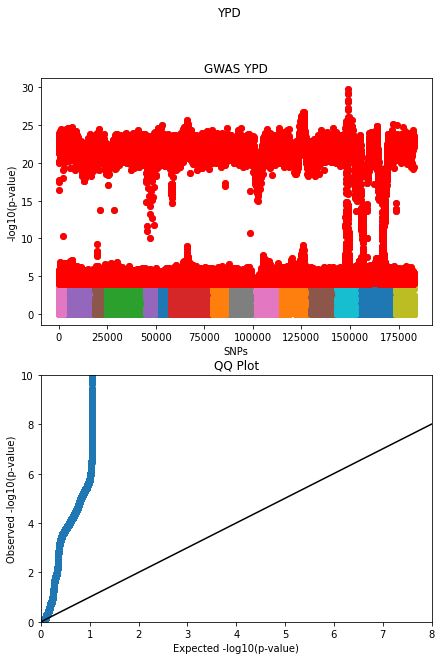

In [99]:
#split columns on any number of spaces 
gwas_ypd = pd.read_csv("plink.YPD.assoc.linear", sep="\s+")
gwas_ypd['logP'] = -1 * np.log10(gwas_ypd['P'])
gwas_ypd['snp_index'] = range(len(gwas_ypd))

# convert to dataframe
df_gwas_ypd = pd.DataFrame(data=gwas_ypd)

# get significant SNPs
sig_ypd = df_gwas_ypd.query('P < 10e-5')

# sort
ypd_sorted = df_gwas_ypd.sort_values(by = "P")
ypd_sorted['uniform_points'] = range(0, len(ypd_sorted))
ypd_sorted['uniform_pval'] = (ypd_sorted['uniform_points'] + 1) / len(ypd_sorted)
ypd_sorted['uniform_logP'] = -1 * np.log10(ypd_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_ypd['snp_index'] = range(len(df_gwas_ypd))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("YPD")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_ypd["snp_index"][df_gwas_ypd["CHR"]==i], df_gwas_ypd["logP"][df_gwas_ypd["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_ypd["snp_index"][sig_ypd["CHR"]==i], sig_ypd["logP"][sig_ypd["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS YPD")

for plot in range(1,2):
    ax[plot].scatter(ypd_sorted["uniform_logP"], ypd_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### YPD/4C

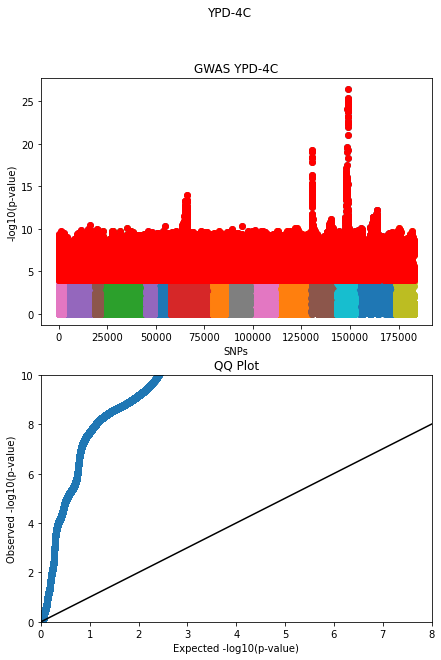

In [100]:
#split columns on any number of spaces 
gwas_ypd4c = pd.read_csv("plink.YPD-4C.assoc.linear", sep="\s+")
gwas_ypd4c['logP'] = -1 * np.log10(gwas_ypd4c['P'])
gwas_ypd4c['snp_index'] = range(len(gwas_ypd4c))

# convert to dataframe
df_gwas_ypd4c = pd.DataFrame(data=gwas_ypd4c)

# get significant SNPs
sig_ypd4c = df_gwas_ypd4c.query('P < 10e-5')

# sort
ypd4c_sorted = df_gwas_ypd4c.sort_values(by = "P")
ypd4c_sorted['uniform_points'] = range(0, len(ypd4c_sorted))
ypd4c_sorted['uniform_pval'] = (ypd4c_sorted['uniform_points'] + 1) / len(ypd4c_sorted)
ypd4c_sorted['uniform_logP'] = -1 * np.log10(ypd4c_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_ypd4c['snp_index'] = range(len(df_gwas_ypd4c))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("YPD-4C")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_ypd4c["snp_index"][df_gwas_ypd4c["CHR"]==i], df_gwas_ypd4c["logP"][df_gwas_ypd4c["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_ypd4c["snp_index"][sig_ypd4c["CHR"]==i], sig_ypd4c["logP"][sig_ypd4c["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS YPD-4C")

for plot in range(1,2):
    ax[plot].scatter(ypd4c_sorted["uniform_logP"], ypd4c_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### YPD/15C

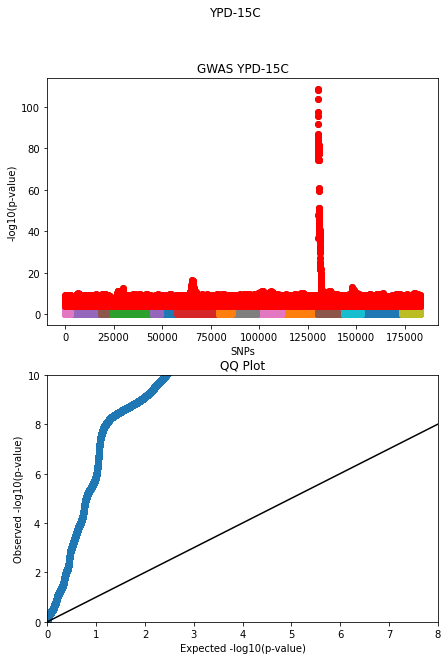

In [101]:
#split columns on any number of spaces 
gwas_ypd15c = pd.read_csv("plink.YPD-15C.assoc.linear", sep="\s+")
gwas_ypd15c['logP'] = -1 * np.log10(gwas_ypd15c['P'])
gwas_ypd15c['snp_index'] = range(len(gwas_ypd15c))

# convert to dataframe
df_gwas_ypd15c = pd.DataFrame(data=gwas_ypd15c)

# get significant SNPs
sig_ypd15c = df_gwas_ypd15c.query('P < 10e-5')

# sort
ypd15c_sorted = df_gwas_ypd15c.sort_values(by = "P")
ypd15c_sorted['uniform_points'] = range(0, len(ypd15c_sorted))
ypd15c_sorted['uniform_pval'] = (ypd15c_sorted['uniform_points'] + 1) / len(ypd15c_sorted)
ypd15c_sorted['uniform_logP'] = -1 * np.log10(ypd15c_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_ypd15c['snp_index'] = range(len(df_gwas_ypd15c))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("YPD-15C")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_ypd15c["snp_index"][df_gwas_ypd15c["CHR"]==i], df_gwas_ypd15c["logP"][df_gwas_ypd15c["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_ypd15c["snp_index"][sig_ypd15c["CHR"]==i], sig_ypd15c["logP"][sig_ypd15c["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS YPD-15C")

for plot in range(1,2):
    ax[plot].scatter(ypd15c_sorted["uniform_logP"], ypd15c_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### YPD/37C

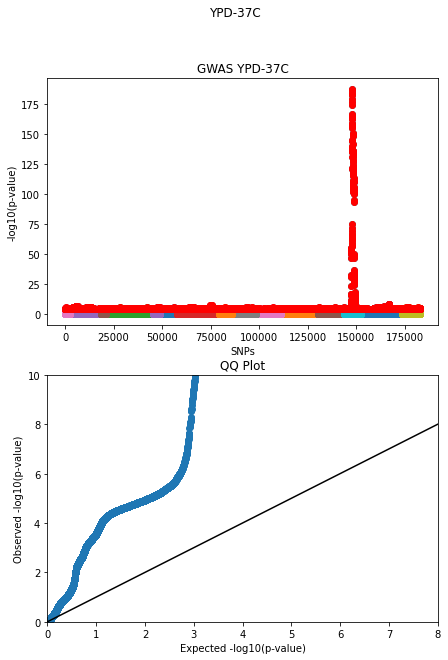

In [102]:
#split columns on any number of spaces 
gwas_ypd37c = pd.read_csv("plink.YPD-37C.assoc.linear", sep="\s+")
gwas_ypd37c['logP'] = -1 * np.log10(gwas_ypd37c['P'])
gwas_ypd37c['snp_index'] = range(len(gwas_ypd37c))

# convert to dataframe
df_gwas_ypd37c = pd.DataFrame(data=gwas_ypd37c)

# get significant SNPs
sig_ypd37c = df_gwas_ypd37c.query('P < 10e-5')

# sort
ypd37c_sorted = df_gwas_ypd37c.sort_values(by = "P")
ypd37c_sorted['uniform_points'] = range(0, len(ypd37c_sorted))
ypd37c_sorted['uniform_pval'] = (ypd37c_sorted['uniform_points'] + 1) / len(ypd37c_sorted)
ypd37c_sorted['uniform_logP'] = -1 * np.log10(ypd37c_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_ypd37c['snp_index'] = range(len(df_gwas_ypd37c))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("YPD-37C")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_ypd37c["snp_index"][df_gwas_ypd37c["CHR"]==i], df_gwas_ypd37c["logP"][df_gwas_ypd37c["CHR"]==i])

    for i in categories_list:
        ax[plot].scatter(sig_ypd37c["snp_index"][sig_ypd37c["CHR"]==i], sig_ypd37c["logP"][sig_ypd37c["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS YPD-37C")

for plot in range(1,2):
    ax[plot].scatter(ypd37c_sorted["uniform_logP"], ypd37c_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()

### Zeocin

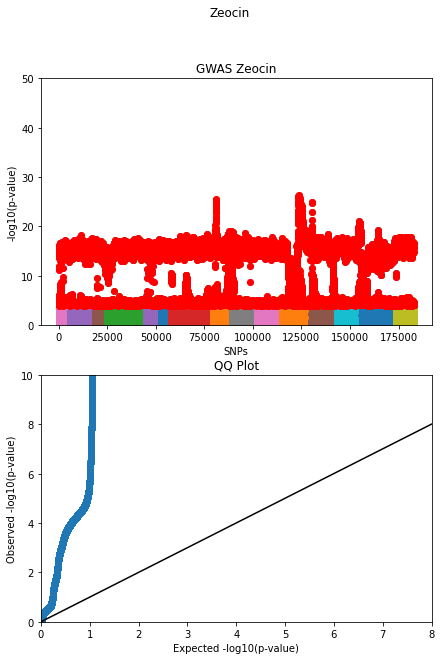

In [65]:
#split columns on any number of spaces 
gwas_zeocin = pd.read_csv("plink.Zeocin.assoc.linear", sep="\s+")
gwas_zeocin['logP'] = -1 * np.log10(gwas_zeocin['P'])
gwas_zeocin['snp_index'] = range(len(gwas_zeocin))

# convert to dataframe
df_gwas_zeocin = pd.DataFrame(data=gwas_zeocin)

# get significant SNPs
sig_zeocin = df_gwas_zeocin.query('P < 10e-5')

# sort
zeocin_sorted = df_gwas_zeocin.sort_values(by = "P")
zeocin_sorted['uniform_points'] = range(0, len(zeocin_sorted))
zeocin_sorted['uniform_pval'] = (zeocin_sorted['uniform_points'] + 1) / len(zeocin_sorted)
zeocin_sorted['uniform_logP'] = -1 * np.log10(zeocin_sorted['uniform_pval'])

import matplotlib.pyplot as plt

df_gwas_zeocin['snp_index'] = range(len(df_gwas_zeocin))

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.suptitle("Zeocin")

for plot in range(1):
    for i in categories_list:
        ax[plot].scatter(df_gwas_zeocin["snp_index"][df_gwas_zeocin["CHR"]==i], df_gwas_zeocin["logP"][df_gwas_zeocin["CHR"]==i])
        ax[plot].set_ylim([0,50])

    for i in categories_list:
        ax[plot].scatter(sig_zeocin["snp_index"][sig_zeocin["CHR"]==i], sig_zeocin["logP"][sig_zeocin["CHR"]==i], color = 'red')
        ax[plot].set_xlabel("SNPs")
        ax[plot].set_ylabel("-log10(p-value)")
        ax[plot].set_title("GWAS Zeocin")
        ax[plot].set_ylim([0,50])

for plot in range(1,2):
    ax[plot].scatter(zeocin_sorted["uniform_logP"], zeocin_sorted["logP"])
    ax[plot].plot([8,0],[8,0], color = "black")
    
    ax[plot].set_xlim([0,8])
    ax[plot].set_ylim([0, 10])
    ax[plot].set_xlabel("Expected -log10(p-value)")
    ax[plot].set_ylabel("Observed -log10(p-value)")
    ax[plot].set_title("QQ Plot")

plt.show()